In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import time 
from scipy import stats
import rebound
from scipy.special import gamma
from scipy.stats import norm, ks_2samp

csvpath = '../csvs/resonant/resonant_features/'
distpath = '../../stabilitydataset/data/resonant_distributions/'

# Merge dataframes

In [3]:
planet_systems = np.loadtxt(csvpath + "order.txt", dtype = str)
print(planet_systems.shape)

(317,)


In [4]:
#save data
#info.to_csv("../../Figures/MCMCFigures/ProbabilityTable_Fixed_Covariences_{0}.csv".format(info.shape[0]))

#FILTER DATA (between 1e4 and 1e7)
info = pd.read_csv("../csvs/resonant/Gaussian_Fits_317.csv")

#fully integrated data
short_feats = pd.read_csv("../csvs/resonant/deltatimes.csv")
subsystem = info["ID"].values.astype(int)
sub_short = short_feats.loc[subsystem]
print(sub_short.shape)

#filtered data params
filtered = sub_short[ (sub_short["t"]>1e4) & (sub_short["t"]<1e7) &
                    (sub_short["t_shadow"]>1e4 ) & (sub_short["t_shadow"]<1e7) ] 

print(filtered.shape)
filtered_inds = filtered.index
#df.loc[df['column_name'].isin(some_values)]
df = info.loc[info["ID"].isin(filtered_inds)] 
df["ID"] = df["ID"].values.astype(int)
df.head()

(317, 3)
(145, 3)


/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # Remove the CWD from sys.path while we load stuff.
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error   Determinant
3    3     0.591132  6.837504  0.306543    0.013839     0.009772  1.828421e-08
4    4     0.763205  5.687568  0.239838    0.010566     0.007649  6.523258e-09
5    5     0.390180  5.797549  0.456784    0.020690     0.014837  9.424556e-08
8    8     0.430419  5.891151  0.417529    0.018658     0.013478  6.323880e-08
13  13     0.724655  4.644210  0.256174    0.011094     0.008051  7.978389e-09

# Plot distributions. Red = gamma, black = gaussian

In [5]:
def plot_hists(planet_systems):
    ncol, nrow = 3,len(planet_systems)//3+1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    for jj , planet_sys in enumerate(planet_systems[:ncol*nrow]):
        try:
            data =pd.read_csv(csvpath+'Res_sys_{0}_500.csv'.format(planet_sys), index_col = 0)
        except:
            data =pd.read_csv(csvpath+'Res_sys_{0}_1000.csv'.format(planet_sys), index_col = 0)
        
        data = data[data["t"]<1e8]
        data["logt"] = np.log10(data["t"])
        name = str(planet_sys)
        # make guassian
        mean, sigma =  df[df["ID"]==int(name)][["Mean", "Sigma"]].values[0]

        x = np.linspace(mean - sigma*4, mean+sigma*4, 100)
        rv = norm(loc = mean, scale = sigma)
        axarr[jj//ncol, jj%ncol ].plot(x, rv.pdf(x), linewidth = 4, color = "black")
        
        data.hist("logt",  ax = axarr[jj//ncol, jj%ncol],  label = name, alpha = 0.7, normed = 1, color = "purple", edgecolor = "black", bins = 20)
        axarr[jj//ncol, jj%ncol ].set_title(name)
        edges = axarr[jj//ncol, jj%ncol ].axes.get_ylim() 
        
    plt.show()
    plt.close(fig)

/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


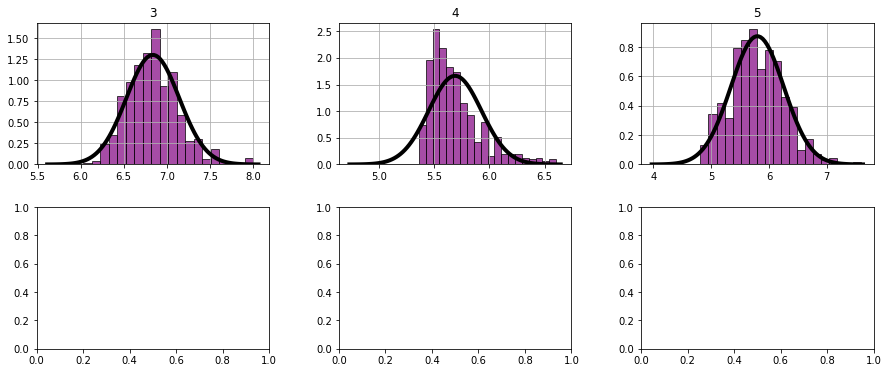

In [6]:
plot_hists([3, 4, 5])

# Plot Orbits

In [7]:
from rebound.plotting import OrbitPlotOneSlice
def plotorbits(IDs):
    ncol, nrow = 3,len(IDs)//3+1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    for jj , ID in enumerate(IDs[:ncol*nrow]):
        file = distpath+"Res_sys_{0}_1e8/simulation_archives/sa{1:0=7d}.bin".format(ID, 0)
        sim = rebound.SimulationArchive(file)[0]
        axarr[jj//ncol, jj%ncol].set_aspect('equal')
        OrbitPlotOneSlice(sim, axarr[jj//ncol, jj%ncol], trails=True) 

Need to install old version of rebound see githash in generate_data.py

/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:86: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


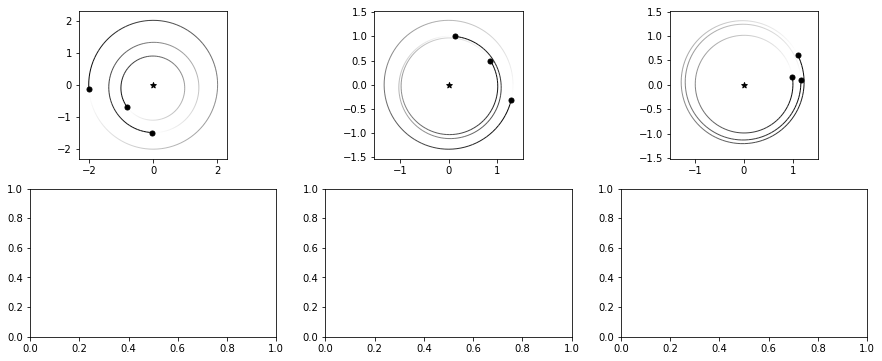

In [8]:
plotorbits([3, 4, 5])

In [9]:
feat = pd.read_csv('../csvs/resonant/resonantshortfeatures.csv', index_col=0)
feat.tail()

Zcross12  Zcross13  Zcross23  maxj  maxk  maxi1  maxi2  maxstrength  \
9994  0.160673  0.603900  0.381870   5.0   1.0    1.0    2.0     0.361500   
9995  0.052687  0.525926  0.449554  27.0   2.0    1.0    2.0     0.000380   
9996  0.084531  0.206673  0.112622   4.0   1.0    1.0    3.0     0.007938   
9997  0.284352  0.365163  0.062919   3.0   1.0    1.0    2.0     0.000939   
9998  0.129620  0.389971  0.230476   6.0   1.0    1.0    2.0     0.046137   

      secondres   EMmed12  ...  medvarZ23  Zcomdrift23  Zcomrollingstd23  \
9994   0.015648  0.515329  ...   0.000007     0.030612          0.004623   
9995   0.111747  0.043751  ...   0.000004     0.386934          0.032405   
9996   0.429958  0.225119  ...   0.005961     0.897836          0.141250   
9997   0.930229  0.140370  ...   0.000067     0.169628          0.005234   
9998   0.025062  0.253309  ...   0.003622     3.934177          0.274804   

      phiZcomdrift23  phiZcomrollingstd23  Zstardrift23  Zstarrollingstd23  \
9994        0.100364             0.003971      0.031363           0.001094   
9995        5.881892             0.039367           NaN                NaN   
9996        1.647894             0.231985      4.690009           1.239133   
9997        0.382853             0.011518      0.036227           0.003163   
9998        0.756952             0.091297      1.591810           0.670621   

      Zcosphistd23  medZcosphi23     tlyap  
9994      0.056033      0.000298 -1.123910  
9995      0.006658      0.000015 -1.221412  
9996      0.215430     -0.001692 -1.443907  
9997      0.105364      0.006206 -1.406371  
9998      0.112916     -0.003571 -1.561252  

[5 rows x 54 columns]

In [10]:
featsN = feat.loc[df['ID']]
featsN.tail()

Zcross12  Zcross13  Zcross23  maxj  maxk  maxi1  maxi2  maxstrength  \
309  0.123763  0.147141  0.020804  33.0   1.0    2.0    3.0     0.005220   
310  0.098671  0.391354  0.266397   8.0   1.0    1.0    2.0     0.002794   
312  0.093667  0.672985  0.529703   8.0   1.0    1.0    2.0     0.020018   
314  0.530839  0.574842  0.028744  24.0   1.0    2.0    3.0     0.013198   
316  0.081716  0.367007  0.263740   9.0   1.0    1.0    2.0     0.117257   

     secondres   EMmed12  ...  medvarZ23  Zcomdrift23  Zcomrollingstd23  \
309   0.059392  0.123929  ...   0.053552     0.152681          0.011254   
310   0.631085  0.808603  ...   0.008479     0.689161          0.026047   
312   0.302373  0.237457  ...   0.000004     0.018373          0.005356   
314   0.651508  0.006198  ...   0.000673     0.379953          0.137895   
316   0.002905  1.174830  ...   0.012832     6.021126          0.229391   

     phiZcomdrift23  phiZcomrollingstd23  Zstardrift23  Zstarrollingstd23  \
309        0.769226             0.024722      2.997743           0.333322   
310        5.627152             0.047807           NaN           0.129979   
312        0.051577             0.005648      0.018931           0.004224   
314        2.599308             0.143325      0.398449           0.165944   
316        1.324236             0.037315           NaN           0.827721   

     Zcosphistd23  medZcosphi23     tlyap  
309      0.413740     -0.007896       NaN  
310      0.173867      0.009963 -1.502258  
312      0.102416      0.001019 -1.100448  
314      0.026423     -0.131771 -1.190763  
316      0.189679      0.002110 -1.194928  

[5 rows x 54 columns]

In [11]:
featsN.columns

Index(['Zcross12', 'Zcross13', 'Zcross23', 'maxj', 'maxk', 'maxi1', 'maxi2',
       'maxstrength', 'secondres', 'EMmed12', 'EMmax12', 'EMdrift12',
       'capseculartscale12', 'EMdetrendedstd12', 'EMrollingstd12',
       'DiffcoeffEM12', 'medvarEM12', 'Zmed12', 'Zmax12', 'Zdetrendedstd12',
       'Zrollingstd12', 'DiffcoeffZ12', 'medvarZ12', 'Zcomdrift12',
       'Zcomrollingstd12', 'phiZcomdrift12', 'phiZcomrollingstd12',
       'Zstardrift12', 'Zstarrollingstd12', 'Zcosphistd12', 'medZcosphi12',
       'EMmed23', 'EMmax23', 'EMdrift23', 'capseculartscale23',
       'EMdetrendedstd23', 'EMrollingstd23', 'DiffcoeffEM23', 'medvarEM23',
       'Zmed23', 'Zmax23', 'Zdetrendedstd23', 'Zrollingstd23', 'DiffcoeffZ23',
       'medvarZ23', 'Zcomdrift23', 'Zcomrollingstd23', 'phiZcomdrift23',
       'phiZcomrollingstd23', 'Zstardrift23', 'Zstarrollingstd23',
       'Zcosphistd23', 'medZcosphi23', 'tlyap'],
      dtype='object')

In [12]:
def runboth(row):
    ID = row['ID']
    mean = row['Mean']
    sigma = row['Sigma']
    
    system = int(ID)
    file = distpath+"Res_sys_{0}_1e8/simulation_archives/sa{1:0=7d}.bin".format(system, 0)
    sim = rebound.SimulationArchive(file)[0]
    res = run(sim, ID, mean, sigma)
    
    system = int(ID)
    file = distpath+"Res_sys_{0}_1e8/simulation_archives/sa{1:0=7d}.bin".format(system, 0)
    sim = rebound.SimulationArchive(file)[0]
    sim.integrator="ias15"
    res += run(sim, ID, mean, sigma)
    
    return res

In [13]:
def runwhfast(row):
    ID = int(row['ID'])
    mean = row['Mean']
    sigma = row['Sigma']
    
    file = distpath+"Res_sys_{0}_1e8/simulation_archives/sa{1:0=7d}.bin".format(ID, 0)
    sim = rebound.SimulationArchive(file)[0]
    row['maxstddetrended'], row['maxda'], row['tlyap'], row['megno'], row['mind'], row['maxm'], row['KSpval'], row['AMD'], row['AMDerr'] = run(sim, ID, mean, sigma)
    return row

In [14]:
def run(sim, ID, mean, sigma):
    ps = sim.particles
    RH12 = ((ps[1].m+ps[2].m)/3.)**(1./3.)*ps[1].a
    RH23 = ((ps[2].m+ps[3].m)/3.)**(1./3.)*ps[2].a
    sim.init_megno()
    Nout = 1000
    times = np.linspace(0, 1e4, Nout)
    e1, e2, e3 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
    a1, a2, a3 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
    d12, d32 = np.zeros(Nout), np.zeros(Nout)
    a10 = sim.particles[1].a
    a20 = sim.particles[2].a
    a30 = sim.particles[3].a
    
    AMD0 = 0
    for p in ps[1:sim.N-sim.N_var]:
        AMD0 += p.m*np.sqrt(sim.G*ps[0].m*p.a)*(1-np.sqrt(1-p.e**2)*np.cos(p.inc))

    AMDerr = np.zeros(Nout)
    
    #rebound.OrbitPlot(sim)
    for i, time in enumerate(times):
        #print(sim.particles[4].x)
        try:
            sim.integrate(time)
        except:
            break
        e1[i] = sim.particles[1].e
        e2[i] = sim.particles[2].e
        e3[i] = sim.particles[3].e
        a1[i] = sim.particles[1].a
        a2[i] = sim.particles[2].a
        a3[i] = sim.particles[3].a
        de12 = np.sqrt((ps[2].e*np.cos(ps[2].pomega)-ps[1].e*np.cos(ps[1].pomega))**2 + (ps[2].e*np.sin(ps[2].pomega)-ps[1].e*np.sin(ps[1].pomega))**2)
        de32 = np.sqrt((ps[2].e*np.cos(ps[2].pomega)-ps[3].e*np.cos(ps[3].pomega))**2 + (ps[2].e*np.sin(ps[2].pomega)-ps[3].e*np.sin(ps[3].pomega))**2)
        da12 = (ps[2].a-ps[1].a)/ps[1].a
        da32 = (ps[3].a-ps[2].a)/ps[2].a
        d12[i] = (da12-de12)/RH12-1.
        d32[i] = (da32-de32)/RH23-1.
        AMD = 0
        for p in ps[1:sim.N-sim.N_var]:
            AMD += p.m*np.sqrt(sim.G*ps[0].m*p.a)*(1-np.sqrt(1-p.e**2)*np.cos(p.inc))
        AMDerr[i] = np.abs((AMD-AMD0)/AMD0)
        
    #rebound.OrbitPlot(sim)
    try:
        p1 = np.poly1d(np.polyfit(times[e1!=0], e1[e1!=0], 3))
        p2 = np.poly1d(np.polyfit(times[e1!=0], e2[e1!=0], 3))
        p3 = np.poly1d(np.polyfit(times[e1!=0], e3[e1!=0], 3))
    except:
        print("ID {0} failed in polyfit".format(ID))
        return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan

    m1 = p1(times[e1!=0])
    m2 = p2(times[e1!=0])
    m3 = p3(times[e1!=0])
    
    std1 = pd.Series(e1[e1!=0]-m1).std()
    std2 = pd.Series(e2[e1!=0]-m2).std()
    std3 = pd.Series(e3[e1!=0]-m3).std()
    std = max(max(std1, std2), std3)
    
    da1 = np.median((a1[e1!=0]-a10)/a10)
    da2 = np.median((a2[e1!=0]-a20)/a20)
    da3 = np.median((a3[e1!=0]-a30)/a30)
    
    da = max(max(da1, da2), da3)
    
    np.random.seed(3)
    try:
        data =pd.read_csv(csvpath + "Res_sys_{0}_500.csv".format(ID), index_col = 0)
    except:
        data =pd.read_csv(csvpath + "Res_sys_{0}_1000.csv".format(ID), index_col = 0)
    del data["runstring"]
    data = data[data["t"]<1e8]
    data = np.log10(data["t"].values)

    # normal we want to match
    test = np.random.normal(loc=mean, scale=sigma, size = data.shape[0])

    #ks test
    try:
        statistic, KSpval = ks_2samp(data, test)
    except:
        statistic, KSpval = 0,0
    
    tlyap = 1/sim.calculate_lyapunov()
    #print(sim.calculate_megno())
    mind = min(d12[e1!=0].min(), d32[e1!=0].min())
    maxm = max(max(ps[1].m, ps[2].m), ps[3].m)
    megno = sim.calculate_megno()
    return [std, da, tlyap, megno, mind, maxm, KSpval, AMD.mean(), AMDerr[e1!=0].max()]

In [15]:
df.iloc[1]

ID             4.000000e+00
Probability    7.632054e-01
Mean           5.687568e+00
Sigma          2.398376e-01
Mean_Error     1.056555e-02
Sigma_Error    7.648520e-03
Determinant    6.523258e-09
Name: 4, dtype: float64

In [20]:
%%time
runwhfast(df.iloc[1])

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


CPU times: user 6.57 s, sys: 96 ms, total: 6.67 s
Wall time: 1.65 s


ID                 4.000000e+00
Probability        7.632054e-01
Mean               5.687568e+00
Sigma              2.398376e-01
Mean_Error         1.056555e-02
Sigma_Error        7.648520e-03
Determinant        6.523258e-09
maxstddetrended    1.334803e-02
maxda              6.390224e-06
tlyap              1.693945e+04
megno              2.493499e+00
mind               1.718754e+00
maxm               4.655616e-05
KSpval             1.329515e-03
AMD                1.234549e-07
AMDerr             1.672156e-02
Name: 4, dtype: float64

In [22]:
df.shape

(145, 7)

In [ ]:
%%time
df = df.apply(runwhfast, axis=1)

In [26]:
%%time
import dask.dataframe as dd
ddf = dd.from_pandas(df, npartitions=24)
testres = runwhfast(df.iloc[0])
df = ddf.apply(runwhfast, axis=1, meta=pd.DataFrame([testres])).compute(scheduler='processes')

/mnt/ssd/workspace/rebound/rebound/simulationarchive.py:89: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)
/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages

ID 211 failed in polyfit


/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/numpy/lib/polynomial.py:627: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


ID 63 failed in polyfit
CPU times: user 6.55 s, sys: 345 ms, total: 6.89 s
Wall time: 22.7 s


In [32]:
df['ID'] = pd.to_numeric(df['ID'], downcast='integer')

In [33]:
%%time
#df['maxstddetrended'], df['maxda'], df['tlyap'], df['megno'], df['mind'], df['maxm'], df['KSpval'], df['AMD'], df['AMDerr'], df['maxstddetrendedIAS'], df['maxdaIAS'], df['tlyapIAS'], df['megnoIAS'], df['mindIAS'], df['maxmIAS'], df['KSpvalIAS'], df['AMDIAS'], df['AMDerrIAS'] = zip(*df.apply(runwrapper, axis=1))
df.head()

CPU times: user 690 µs, sys: 0 ns, total: 690 µs
Wall time: 678 µs


ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
3    3     0.591132  6.837504  0.306543    0.013839     0.009772   
4    4     0.763205  5.687568  0.239838    0.010566     0.007649   
5    5     0.390180  5.797549  0.456784    0.020690     0.014837   
8    8     0.430419  5.891151  0.417529    0.018658     0.013478   
13  13     0.724655  4.644210  0.256174    0.011094     0.008051   

     Determinant  maxstddetrended     maxda         tlyap      megno  \
3   1.828421e-08         0.003333  0.000025 -2.849455e+06   2.027302   
4   6.523258e-09         0.013348  0.000006  1.830745e+04   2.547765   
5   9.424556e-08         0.004048  0.000038  1.031647e+03  11.419005   
8   6.323880e-08         0.016062  0.000025  2.833805e+03   5.970266   
13  7.978389e-09         0.018841  0.000401  7.624774e+05   2.003783   

         mind      maxm    KSpval           AMD    AMDerr  
3   10.568203  0.000047  0.403103  2.050094e-06  0.004522  
4    1.718754  0.000047  0.001330  1.234549e-07  0.016722  
5    2.473388  0.000004  0.930714  3.767014e-08  0.005825  
8    0.543701  0.000077  0.709091  1.805307e-06  0.006754  
13  -3.291228  0.000011  0.000218  2.787662e-07  0.030200

In [160]:
%%time
df['maxstddetrended'], df['maxda'], df['tlyap'], df['megno'], df['mind'], df['maxm'], df['KSpval'], df['AMD'], df['AMDerr'] = zip(*df.apply(runwhfast, axis=1))
df.head()

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CPU times: user 15min 1s, sys: 2min 5s, total: 17min 6s
Wall time: 6min 5s


In [162]:
df.tail()

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
261  309     0.301547  4.118655  0.656055    0.031530     0.021869   
262  310     0.400735  3.660408  0.446401    0.020650     0.014121   
263  312     0.593583  6.935178  0.299831    0.013871     0.009658   
264  314     0.783620  5.946330  0.230923    0.010544     0.007336   
266  316     0.615725  5.167530  0.292705    0.013175     0.009443   

      Determinant  maxstddetrended     maxda         tlyap      megno  \
261  4.751810e-07         0.005034  0.000672           NaN        NaN   
262  8.495002e-08         0.004912  0.007030  4.944905e+01  43.704154   
263  1.794137e-08         0.012825  0.000351  2.344911e+03   6.251856   
264  5.978569e-09         0.001885  0.000090  3.498420e+06   1.999814   
266  1.547597e-08         0.010255  0.000003  1.121979e+05   2.101200   

         mind          maxm         KSpval           AMD    AMDerr  
261  0.345453  4.577804e-07  2.168249e-195  3.150599e-09  0.091420  
262 -0.166147  2.134722e-05  4.494031e-221  4.581974e-07  0.061612  
263  2.953487  2.768826e-05  2.340360e-178  2.240330e-06  0.001062  
264  1.869129  6.876047e-05  1.528646e-113  4.871244e-09  0.002533  
266 -2.641627  1.162573e-05   4.555100e-83  2.142619e-07  0.002833

In [34]:
def lyap(system):
    file = distpath+"Res_sys_{0}_1e8/simulation_archives/sa{1:0=7d}.bin".format(system, 0)
    sim = rebound.SimulationArchive(file)[0]
    ps = sim.particles
    sim.init_megno(seed=3)
    Nout = 1000
    times = np.linspace(0, 1e4, Nout)
    Ys, megnos = np.zeros(Nout), np.zeros(Nout)
    d = np.zeros(Nout)
    e = np.zeros(Nout)
    for i, time in enumerate(times):
        try:
            sim.integrate(time)
            e[i] = ps[2].e
            Ys[i] = sim.megno_Ys/sim.t
            megnos[i] = sim.calculate_megno()
            d[i] = np.sqrt((ps[3].x-ps[2].x)**2 + (ps[3].y-ps[2].y)**2 + (ps[3].z-ps[2].z)**2)
        except:
            pass
        
    print(sim.calculate_lyapunov(), 1/sim.calculate_lyapunov())
    return Ys, megnos, times, sim, d, e

In [35]:
import os

def collision(reb_sim, col):
    reb_sim.contents._status=5
    return 0

def es(system, Nshadows, tmax=1.e4):
    folder = distpath + "Res_sys_{0}_1e8/simulation_archives/".format(system)#ic{1:0=7d}.bin".format(system, 0)
    root, dirs, files = next(os.walk(folder))
    Nsys=0
    for file in files:
        try:
            sim = rebound.SimulationArchive(folder+file)[0]
            Nsys += 1
        except:
            print('Didnt load')
    Nout = 1000
    es = np.zeros((Nsys, Nout))
    for j, file in enumerate(files[:Nshadows]):
        try:
            sim = rebound.SimulationArchive(folder+file)[0]
            sim.collision_resolve = collision
            sim.exit_max_distance = 100.
            ps = sim.particles
            times = np.linspace(0, tmax, Nout)
            for i, time in enumerate(times):
                try:
                    sim.integrate(time)
                    es[j, i] = ps[2].e
                except:
                    print("fail")
                    break
        except:
            print(ps[0].m, ps[1].m, ps[2].m, ps[3].m, sim.G, sim.t)
            rebound.OrbitPlot(sim)
    
    return times, es

In [36]:
df[(df['Mean'] < 4)]

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
130  130     0.261479  3.991695  0.700621    0.030738     0.022546   
215  222     0.403703  3.875383  0.446100    0.020107     0.013939   
218  228          inf  3.549212  0.174091         inf          inf   
223  242     0.206341  2.903427  0.890806    0.038853     0.027763   
227  246     0.486466  3.915196  0.369486    0.016800     0.011460   
253  299     0.527568  3.676061  0.342948    0.015538     0.010608   
262  310     0.400735  3.660408  0.446401    0.020650     0.014121   

      Determinant  maxstddetrended     maxda        tlyap       megno  \
130  4.801571e-07         0.005443  0.000223   105.966199   16.918405   
215  7.855710e-08         0.024704  0.041015          NaN         NaN   
218           inf         0.008149  0.000357  1411.584034    7.252799   
223  1.163594e-06         0.016897  0.000615    19.757641   13.383814   
227  3.698646e-08         0.001510  0.000763          NaN         NaN   
253  2.717097e-08         0.003922  0.001046    65.632519  118.861153   
262  8.495002e-08         0.004912  0.007030    49.205424   43.602023   

         mind          maxm        KSpval           AMD    AMDerr  
130 -0.144171  2.780840e-05  1.851544e-02  2.067450e-08  0.279084  
215  0.723855  7.244565e-05  4.667765e-02  1.973195e-06  5.266159  
218  0.190417  8.184642e-06  5.088269e-20  6.250219e-08  0.057132  
223  0.836727  7.688246e-05  4.330748e-08  9.861424e-08  2.560856  
227 -2.755923  4.856284e-07  2.184325e-01  1.243262e-08  0.018058  
253 -0.711408  2.870973e-06  8.567045e-01  5.596821e-08  0.018168  
262 -0.166147  2.134722e-05  5.547862e-02  4.581974e-07  0.061612

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


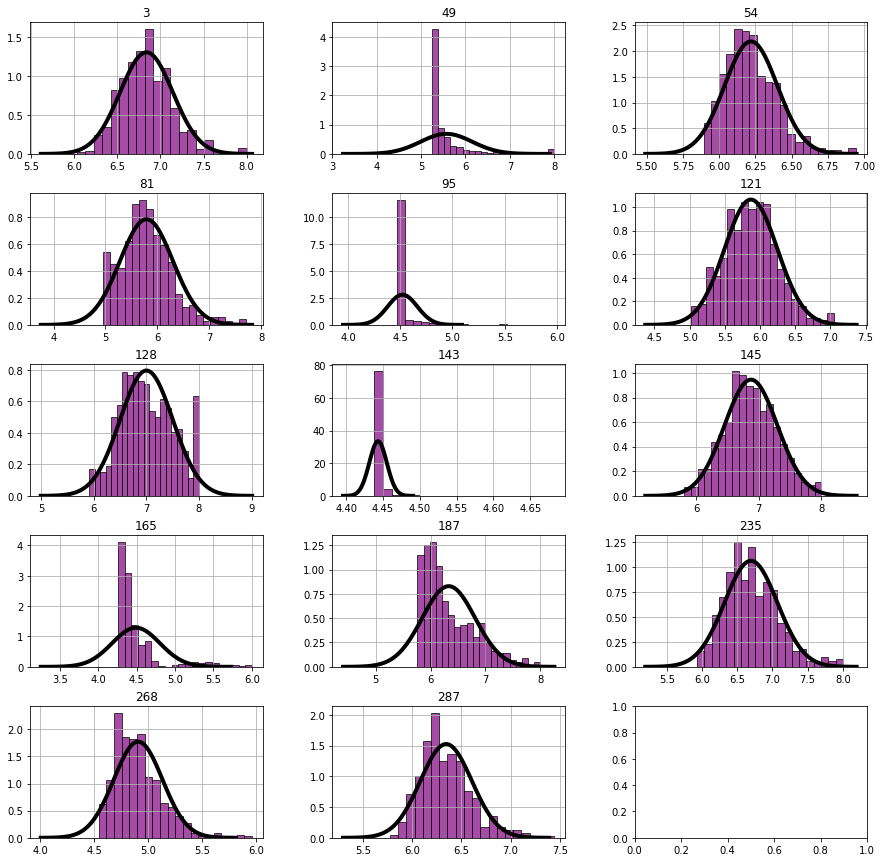

In [37]:
plot_hists(df.loc[df['tlyap'] < 0, 'ID'].values)

(array([ 3.,  0.,  0.,  0.,  0.,  2.,  1.,  3., 15., 97.]),
 array([-1.95573255e+01, -1.76026377e+01, -1.56479499e+01, -1.36932621e+01,
        -1.17385744e+01, -9.78388660e+00, -7.82919883e+00, -5.87451106e+00,
        -3.91982328e+00, -1.96513551e+00, -1.04477412e-02]),
 <a list of 10 Patch objects>)

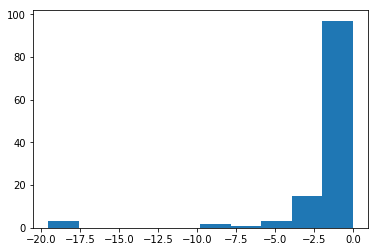

In [38]:
fig, ax = plt.subplots()
ax.hist(np.log10(df.loc[df['tlyap'] > 0, 'KSpval']))

In [39]:
weird = df[df['KSpval'] < 1.e-10]
weird

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
49    49     0.312790  5.570552  0.581446    0.025843     0.018131   
60    60          inf  4.283397  0.085474         inf          inf   
89    89          inf  4.266151  0.018597         inf          inf   
95    95          inf  4.520902  0.142438         inf          inf   
143  143          inf  4.443182  0.011909         inf          inf   
165  165     0.584598  4.491704  0.309658    0.013914     0.009969   
218  228          inf  3.549212  0.174091         inf          inf   

      Determinant  maxstddetrended     maxda         tlyap     megno  \
49   2.192589e-07         0.009862  0.000006 -4.405068e+05  1.973721   
60            inf         0.002570  0.002678  1.107395e+03  9.958201   
89            inf         0.016447  0.000113  1.635140e+03  8.423601   
95            inf         0.032531  0.002088 -9.927838e+04  2.132590   
143           inf         0.003962  0.000002 -2.559122e+06  2.000269   
165  1.924203e-08         0.002102  0.001781 -8.616611e+04  2.001556   
218           inf         0.008149  0.000357  1.411584e+03  7.252799   

         mind      maxm        KSpval           AMD    AMDerr  
49   0.213552  0.000002  5.088269e-20  8.975162e-09  0.001793  
60  -1.082350  0.000064  2.771243e-20  2.347201e-06  0.005660  
89   2.453829  0.000024  1.790086e-18  5.106558e-07  0.019814  
95  -1.372703  0.000026  9.937725e-36  4.735429e-07  0.024951  
143 -4.151499  0.000075  2.458719e-25  8.563109e-08  0.007228  
165  7.103477  0.000077  8.877114e-14  3.186385e-05  0.003915  
218  0.190417  0.000008  5.088269e-20  6.250219e-08  0.057132

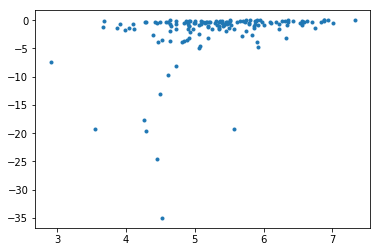

In [40]:
fig, ax = plt.subplots()
ax.plot(df['Mean'], np.log10(df['KSpval']), '.')

In [41]:
df.to_csv(csvpath+'distributionfeaturesnew.csv')

# Start Here

In [12]:
df = pd.read_csv(csvpath+'distributionfeaturesnew.csv', index_col=0)
df.tail()

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
261  309     0.301547  4.118655  0.656055    0.031530     0.021869   
262  310     0.400735  3.660408  0.446401    0.020650     0.014121   
263  312     0.593583  6.935178  0.299831    0.013871     0.009658   
264  314     0.783620  5.946330  0.230923    0.010544     0.007336   
266  316     0.615725  5.167530  0.292705    0.013175     0.009443   

      Determinant  maxstddetrended     maxda         tlyap      megno  \
261  4.751810e-07         0.005034  0.000672           NaN        NaN   
262  8.495002e-08         0.004912  0.007030  4.920542e+01  43.602023   
263  1.794137e-08         0.012825  0.000351  3.479866e+03   4.790411   
264  5.978569e-09         0.001885  0.000090  3.638953e+05   1.993391   
266  1.547597e-08         0.010255  0.000003  1.404026e+06   2.097663   

         mind          maxm    KSpval           AMD    AMDerr  
261  0.345453  4.577804e-07  0.031206  3.150599e-09  0.091420  
262 -0.166147  2.134722e-05  0.055479  4.581974e-07  0.061612  
263  2.953487  2.768826e-05  0.976230  2.240330e-06  0.001062  
264  1.869129  6.876047e-05  0.976230  4.871244e-09  0.002533  
266 -2.641627  1.162573e-05  0.403103  2.142619e-07  0.002833

In [15]:
df.shape

(145, 16)

In [44]:
good = df['KSpval'] > 1.e-10
df[good].head()

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
3    3     0.591132  6.837504  0.306543    0.013839     0.009772   
4    4     0.763205  5.687568  0.239838    0.010566     0.007649   
5    5     0.390180  5.797549  0.456784    0.020690     0.014837   
8    8     0.430419  5.891151  0.417529    0.018658     0.013478   
13  13     0.724655  4.644210  0.256174    0.011094     0.008051   

     Determinant  maxstddetrended     maxda         tlyap      megno  \
3   1.828421e-08         0.003333  0.000025 -2.849455e+06   2.027302   
4   6.523258e-09         0.013348  0.000006  1.830745e+04   2.547765   
5   9.424556e-08         0.004048  0.000038  1.031647e+03  11.419005   
8   6.323880e-08         0.016062  0.000025  2.833805e+03   5.970266   
13  7.978389e-09         0.018841  0.000401  7.624774e+05   2.003783   

         mind      maxm    KSpval           AMD    AMDerr  
3   10.568203  0.000047  0.403103  2.050094e-06  0.004522  
4    1.718754  0.000047  0.001330  1.234549e-07  0.016722  
5    2.473388  0.000004  0.930714  3.767014e-08  0.005825  
8    0.543701  0.000077  0.709091  1.805307e-06  0.006754  
13  -3.291228  0.000011  0.000218  2.787662e-07  0.030200

In [62]:
def collision(reb_sim, col):
    reb_sim.contents._status = 5
    return 0

from scipy.optimize import brenth
def F(e,alpha,gamma):
    """Equation 35 of Laskar & Petit (2017)"""
    denom = np.sqrt(alpha*(1-e*e)+gamma*gamma*e*e)
    return alpha*e -1 + alpha + gamma*e / denom

### start AMD functions

def critical_relative_AMD(alpha,gamma):
    """Equation 29"""
    e0 = np.min((1,1/alpha-1))
    ec = brenth(F,0,e0,args=(alpha,gamma))
    e1c = np.sin(np.arctan(gamma*ec / np.sqrt(alpha*(1-ec*ec))))
    curlyC = gamma*np.sqrt(alpha) * (1-np.sqrt(1-ec*ec)) + (1 - np.sqrt(1-e1c*e1c))
    return curlyC

def compute_AMD(sim):
    pstar = sim.particles[0]
    Ltot = pstar.m * np.cross(pstar.xyz,pstar.vxyz)
    ps = sim.particles[1:]
    Lmbda=np.zeros(len(ps))
    G = np.zeros(len(ps))
    Lhat = np.zeros((len(ps),3))
    for k,p in enumerate(sim.particles[1:]):
        orb = p.calculate_orbit(primary=pstar)
        Lmbda[k] = p.m * np.sqrt(p.a)
        G[k] = Lmbda[k] * np.sqrt(1-p.e*p.e)
        hvec = np.cross(p.xyz,p.vxyz)
        Lhat[k] = hvec / np.linalg.norm(hvec)
        Ltot = Ltot + p.m * hvec
    cosi = np.array([Lh.dot(Ltot) for Lh in Lhat]) / np.linalg.norm(Ltot)
    return np.sum(Lmbda) - np.sum(G * cosi)

def AMD_stable_Q(sim):
    AMD = compute_AMD(sim)
    pstar = sim.particles[0]
    ps = sim.particles[1:]
    for i in range(len(ps)-1):
        pIn = ps[i]
        pOut = ps[i+1]
        orbIn = pIn.calculate_orbit(pstar)
        orbOut = pOut.calculate_orbit(pstar)
        alpha = orbIn.a / orbOut.a
        gamma = pIn.m / pOut.m
        LmbdaOut = pOut.m * np.sqrt(orbOut.a)
        Ccrit = critical_relative_AMD(alpha,gamma)
        C = AMD / LmbdaOut
        if C>Ccrit:
            return False
    return True

def AMD_stability_coefficient(sim, i1, i2):
    AMD = compute_AMD(sim)
    ps = sim.particles
    pstar = ps[0]
    
    pIn = ps[i1]
    pOut = ps[i2]
    orbIn = pIn.calculate_orbit(pstar)
    orbOut = pOut.calculate_orbit(pstar)
    alpha = orbIn.a / orbOut.a
    gamma = pIn.m / pOut.m
    LmbdaOut = pOut.m * np.sqrt(orbOut.a)
    Ccrit = critical_relative_AMD(alpha,gamma)
    C = AMD / LmbdaOut
    return C / Ccrit

def findres2(sim, i1, i2):
    maxorder = 2
    ps = Poincare.from_Simulation(sim=sim).particles # get averaged mean motions
    n1 = ps[i1].n
    n2 = ps[i2].n

    m1 = ps[i1].m/ps[i1].M
    m2 = ps[i2].m/ps[i2].M

    Pratio = n2/n1
    if np.isnan(Pratio): # probably due to close encounter where averaging step doesn't converge 
        return np.nan, np.nan, np.nan

    delta = 0.03
    minperiodratio = max(Pratio-delta, 0.)
    maxperiodratio = min(Pratio+delta, 0.999) # too many resonances close to 1
    res = resonant_period_ratios(minperiodratio,maxperiodratio, order=2)
    
    Z = np.sqrt((ps[i1].e*np.cos(ps[i1].pomega) - ps[i2].e*np.cos(ps[i2].pomega))**2 + (ps[i1].e*np.sin(ps[i1].pomega) - ps[i2].e*np.sin(ps[i2].pomega))**2)
    Zcross = (ps[i2].a-ps[i1].a)/ps[i1].a
        
    j, k, i1, i2, maxstrength = -1, -1, -1, -1, -1
    for a, b in res:
        s = np.abs(np.sqrt(m1+m2)*(Z/Zcross)**((b-a)/2.)/((b*n2 - a*n1)/n1))
        #print('{0}:{1}'.format(b, a), (b*n2 - a*n1), s)
        if s > maxstrength:
            j = b
            k = b-a
            maxstrength = s
    
    if maxstrength > -1:
        return j, k, maxstrength
    else:
        return np.nan, np.nan, np.nan
    
def info(ID):
    runstring = '{0:07d}.bin'.format(ID)
    snapshot = 0
    sa = rebound.SimulationArchive(respath+sapath+runstring)
    simf = sa[-1]

    print("m1={0}, m2={1}, m3={2}".format(simf.particles[1].m, simf.particles[2].m, simf.particles[3].m))
    N = simf.N
    ps = simf.particles
    mindRH = 100.
    for i, [i1, i2] in enumerate(itertools.combinations(np.arange(1, N), 2)):
        i1 = int(i1)
        i2 = int(i2)
        d = np.sqrt((ps[i1].x-ps[i2].x)**2 + (ps[i1].y-ps[i2].y)**2 + (ps[i1].z-ps[i2].z)**2)
        RH = ps[i1].a*((ps[i1].m + ps[i2].m)/ps[0].m)**(1./3.)
        if d/RH < mindRH:
            dRHi = [i1, i2] # two indices that collided
            mindRH = d/RH
    print('Particles {0} collided at t = {1:.2e}'.format(dRHi, sa[-1].t))

    sim = sa[0]
    ps = sim.particles
    for j, [i1, i2] in enumerate(itertools.combinations(np.arange(1, N), 2)):
        i1, i2 = int(i1), int(i2)
        j, k, strength = findres2(sim, i1, i2) # max strength between i1 and i2
        Zcross = (ps[i2].a-ps[i1].a)/ps[i1].a
        RH = ps[i1].a*((ps[i1].m + ps[i2].m)/ps[0].m)**(1./3.)
        beta = (ps[i2].a-ps[i1].a)/RH
        emZc = np.sqrt((ps[i2].e*np.cos(ps[i2].pomega)-ps[i1].e*np.cos(ps[i1].pomega))**2 + (ps[i2].e*np.sin(ps[i2].pomega)-ps[i1].e*np.sin(ps[i1].pomega))**2)/Zcross
        if strength > -1:
            print('Pair {0}{1}: Zcross = {2:.3f}, Z/Zcross = {3:.3f}, delta a/RH = {4:.2f}, Strongest Resonance (strength) = {5}:{6} ({7:.2f})'.format(i1, i2, Zcross, emZc, beta, j, j-k, strength))
        else:
            print('Pair {0}{1}: Zcross = {2:.3f}, Z/Zcross = {3:.3f}, delta a/RH = {4:.2f}, Strongest Resonance = None'.format(i1, i2, Zcross, emZc, beta))
    return  rebound.OrbitPlot(sa[0])

def fillnan(features, pairs):
    features['tlyap'] = np.nan
    features['megno'] = np.nan
    
    for i, [label, i1, i2] in enumerate(pairs):
        features['EMmed'+label] = np.nan
        features['EMmax'+label] = np.nan
        features['EMdrift'+label] = np.nan
        features['EMrollingstd'+label] = np.nan
        features['Zcommed'+label] = np.nan
        features['Zsepouter'+label] = np.nan
        features['ZfreeIC'+label] = np.nan
        features['ZfreeOC'+label] = np.nan
        features['Zfree'+label] = np.nan
        features['Zstarmed'+label] = np.nan
        features['Zstarstd'+label] = np.nan
        features['Zstarmed'+label] = np.nan
        features['Zstardrift'+label] = np.nan

def plot(ID, Norbits):  
    runstring = '{0:07d}.bin'.format(ID)
    snapshot = 0
    sa = rebound.SimulationArchive(respath+sapath+runstring)
    sim = sa[snapshot]

    Nout = 1000
    ###############################
    sim.collision_resolve = collision
    sim.ri_whfast.keep_unsynchronized = 1
    sim.ri_whfast.safe_mode = 0
    ##############################
    features = OrderedDict()
    ps = sim.particles
    sim.init_megno()
    N = sim.N - sim.N_var
    a0 = [0] + [sim.particles[i].a for i in range(1, N)]
    Npairs = int((N-1)*(N-2)/2)
    maxj, maxk, maxi1, maxi2, maxpairindex, maxstrength = -1, -1, -1, -1, -1, -1
    betas, Zcross = np.zeros(Npairs), np.zeros(Npairs)
    #print('pairindex, i1, i2, j, k, strength')
    for i, [i1, i2] in enumerate(itertools.combinations(np.arange(1, N), 2)):
        i1 = int(i1); i2 = int(i2)
        RH = ps[i1].a*((ps[i1].m + ps[i2].m)/ps[0].m)**(1./3.)
        betas[i] = (ps[i2].a-ps[i1].a)/RH
        Zcross[i] = (ps[int(i2)].a-ps[int(i1)].a)/ps[int(i1)].a / np.sqrt(2) # IMPORTANT FACTOR OF SQRT(2)! Z = EM/sqrt(2)
        
    features['betaouter'] = betas[1]
    if Zcross[0] < Zcross[2]: # 0 = '1-2', 2='2-3'
        features['nearpair'] = 12 # for visualization and debugging
        features['betanear'] = betas[0]
        features['betafar'] = betas[2]
        pairs = [['near', 1,2], ['far', 2, 3], ['outer', 1, 3]]
    else:
        features['nearpair'] = 23
        features['betanear'] = betas[2]
        features['betafar'] = betas[0]
        pairs = [['near', 2, 3], ['far', 1, 2], ['outer', 1, 3]]
    
    Zsepinners, Zsepouters, separatrixdist = np.zeros(Npairs), np.zeros(Npairs), np.zeros(Npairs)
    for i, [label, i1, i2] in enumerate(pairs):
        features['numfixedpoints'+label] = np.nan
        features['j'+label], features['k'+label], features['strength'+label] = findres2(sim, i1, i2) # returns nans if no res found
        features["C_AMD"+label] = AMD_stability_coefficient(sim, i1, i2)
        features['Zcross'+label] = (ps[int(i2)].a-ps[int(i1)].a)/ps[int(i1)].a
        if np.isnan(features['strength'+label]) == False:
            pvars = Poincare.from_Simulation(sim)
            avars = Andoyer.from_Poincare(pvars, j=features['j'+label], k=features['k'+label], a10=a0[i1], i1=i1, i2=i2)
            features['numfixedpoints'+label] = get_num_fixed_points(features['k'+label], avars.Phiprime)
            Zsepinners[i] = avars.Zsep_inner
            Zsepouters[i] = avars.Zsep_outer
            separatrixdist[i] = min(Zsepouters[i]-avars.Zstar, avars.Zstar-Zsepinners[i])
            
    P0 = ps[1].P
    times = np.linspace(0, Norbits*P0, Nout)
    rebound_Z, rebound_phi = np.zeros((Npairs,Nout)), np.zeros((Npairs,Nout))
    rebound_Zcom, rebound_phiZcom = np.zeros((Npairs,Nout)), np.zeros((Npairs,Nout))
    rebound_Zstar, rebound_dKprime = np.zeros((Npairs,Nout)), np.zeros((Npairs,Nout))
    rebound_Zsepinner, rebound_Zsepouter = np.zeros((Npairs,Nout)), np.zeros((Npairs,Nout))
    rebound_Zstarnonres, rebound_Zstarunstable = np.zeros((Npairs,Nout)), np.zeros((Npairs,Nout))
    eminus = np.zeros((Npairs,Nout))
    
    features['unstableinNorbits'] = False
    for i,t in enumerate(times):
        for j, [label, i1, i2] in enumerate(pairs):
            #i1 = int(i1); i2 = int(i2)
            eminus[j, i] = np.sqrt((ps[i2].e*np.cos(ps[i2].pomega)-ps[i1].e*np.cos(ps[i1].pomega))**2 + (ps[i2].e*np.sin(ps[i2].pomega)-ps[i1].e*np.sin(ps[i1].pomega))**2)
            if np.isnan(features['strength'+label]) == False:
                pvars = Poincare.from_Simulation(sim)
                avars = Andoyer.from_Poincare(pvars, j=features['j'+label], k=features['k'+label], a10=a0[i1], i1=i1, i2=i2)
            
                rebound_Z[j, i] = avars.Z
                rebound_phi[j, i] = avars.phi
                rebound_Zcom[j, i] = avars.Zcom
                rebound_phiZcom[j, i] = avars.phiZcom
                rebound_Zstar[j, i] = avars.Zstar
                rebound_dKprime[j, i] = avars.dKprime
                rebound_Zsepinner[j, i] = avars.Zsep_inner
                rebound_Zsepouter[j, i] = avars.Zsep_outer
                rebound_Zstarnonres[j, i] = avars.Zstar_nonres
                rebound_Zstarunstable[j, i] = avars.Zstar_unstable
        try:
            sim.integrate(t*P0, exact_finish_time=0)
        except:
            features['unstableinNorbits'] = True
            break
            
    fillnan(features, pairs)
    
    # Features with or without resonances:
    tlyap = 1./np.abs(sim.calculate_lyapunov())/P0
    if tlyap > Norbits:
        tlyap = Norbits
    features['tlyap'] = tlyap
    features['megno'] = sim.calculate_megno()
    
    for i, [label, i1, i2] in enumerate(pairs):
        Zc = features['Zcross'+label]
        EM = eminus[i,:]/Zc
        features['EMmed'+label] = np.median(EM)
        features['EMmax'+label] = EM.max()
        try:
            p = np.poly1d(np.polyfit(times, EM, 3))
            m = p(times)
            EMdrift = np.abs((m[-1]-m[0])/m[0])
            features['EMdrift'+label] = EMdrift
        except:
            pass
        rollstd = pd.Series(EM).rolling(window=10).std()
        features['EMrollingstd'+label] = rollstd[10:].median()/features['EMmed'+label]
        
        if np.isnan(features['strength'+label]) == False:
            features['Zcommed'+label] = np.median(rebound_Zcom[i,:])
            features['Zsepouter'+label] = Zsepouters[i]/Zc
            
            # try this one generically for variation in constants, since all fixed points seem to follow Zstar closely?
            if np.median(rebound_Zstar[i,:]) > 0:
                features['Zstarstd'+label] = rebound_Zstar[i,:].std()/np.median(rebound_Zstar[i,:])
                
            if np.median(rebound_Z[i,:]) < Zsepinners[i]:
                features['ZfreeIC'+label] = rebound_Z[i,:].max()/Zsepinners[i]
            elif np.median(rebound_Z[i,:]) > Zsepouters[i]:
                features['ZfreeOC'+label] = rebound_Z[i,:].min()/Zsepouters[i]
            else:
                if np.median(rebound_Zstar[i,:]) > 0:
                    features['Zstarmed'+label] = np.median(rebound_Zstar[i,:])/Zc
                    try:
                        p = np.poly1d(np.polyfit(times, rebound_Zstar[i,:], 3))
                        m = p(times)
                        Zstardrift = np.abs((m[-1]-m[0])/m[0])
                        features['Zstardrift'+label] = Zstardrift
                    except:
                        pass
                    features['Zfree'+label] = (rebound_Z[i,:]-rebound_Zstar[i,:]).std()/separatrixdist[i]
    
    fig, axarr = plt.subplots(nrows=4, ncols=3, figsize=(24,24))

    Zlim = 0
    for i, [label, i1, i2] in enumerate(pairs):
        Zlim = max(Zlim, np.max(np.abs(rebound_Z[i,:]/Zcross[i])))

    Zlim *= 1.5

    colors = ['orange', 'green', 'blue']
    
    for i, [label, i1, i2] in enumerate(pairs):
        ax = axarr[0,i]
        if rebound_Z[i,:].mean() > 0:
            ax.plot(rebound_Z[i,:]/Zcross[i]*np.cos(rebound_phi[i,:]), rebound_Z[i,:]/Zcross[i]*np.sin(rebound_phi[i,:]), '.', label=label, color=colors[i])

        ax.set_ylabel('Zsinphi/Zcross')
        ax.set_ylabel('Zcosphi/Zcross')
        ax.set_xlim([-Zlim, Zlim])
        ax.set_ylim([-Zlim, Zlim])
        ax.set_aspect('equal')
        ax.legend()
    
    ax = axarr[1,0]
    for i in range(3):
        if rebound_Z[i,:].mean() > 0:
            ax.plot(times, rebound_Z[i,:]/Zcross[i], '.', label=pairs[i], color=colors[i])
    ax.set_ylim([0, Zlim])
    ax.set_ylabel('Z/Zcross')
    ax.legend()
    
    ax = axarr[1,1]
    for i in range(3):
        ax.plot(times, eminus[i,:]/np.sqrt(2)/Zcross[i], '.', label=pairs[i], color=colors[i])
    ax.set_ylim([0, Zlim])
    ax.set_ylabel('EM/EMcross')
    ax.legend()
    
    ax = axarr[2,0]
    for i in range(3):
        if rebound_Z[i,:].mean() > 0:
            ax.plot(times, rebound_Zcom[i,:]/Zcross[i], '.', label=pairs[i], color=colors[i])

    ax.set_ylabel('Zcom/Zcross')
    ax.legend()

    ax = axarr[2,1]
    for i in range(3):
        if rebound_Z[i,:].mean() > 0:
            ax.plot(times, rebound_phiZcom[i,:], '.', label=pairs[i], color=colors[i])

    ax.set_ylabel('phiZcom')
    ax.legend()
    
    ax = axarr[2, 2]
    for i in range(3):
        if rebound_Zstarnonres[i,:].mean() > 0:
            ax.plot(times, (rebound_Z[i,:]-rebound_Zstar[i,:])/Zcross[i], '.', label=pairs[i], color=colors[i])

    ax.set_ylabel('(Z-Zstar)/Zcross')
    ax.legend()

    ax = axarr[3,0]
    for i in range(3):
        if rebound_Z[i,:].mean() > 0:
            ax.plot(times, rebound_Zstar[i,:]/Zcross[i], '.', label=pairs[i], color=colors[i])

    ax.set_ylim([0, Zlim])
    ax.set_ylabel('Zstar/Zcross')
    ax.legend()

    ax = axarr[3,1]
    for i in range(3):
        if rebound_Zstarnonres[i,:].mean() > 0:
            ax.plot(times, rebound_Zsepouter[i,:]/Zcross[i], '.', label=pairs[i], color=colors[i])

    ax.set_ylabel('Zsepouter/Zcross')
    ax.set_ylim([0, Zlim])
    ax.legend()

    ax = axarr[3,2]
    for i in range(3):
        if rebound_Zstarnonres[i,:].mean() > 0:
            ax.plot(times, (rebound_Zsepouter[i,:]-rebound_Zstar[i,:])/Zcross[i], '.', label=pairs[i], color=colors[i])
            ax.plot(times, (rebound_Zstar[i,:]-rebound_Zsepinner[i,:])/Zcross[i], '.', label=pairs[i], color=colors[i])

    Zsepouteravg = ((rebound_Zsepouter[i,:]-rebound_Zstar[i,:])/Zcross[i]).mean()
    Zsepinneravg = ((rebound_Zstar[i,:]-rebound_Zsepinner[i,:])/Zcross[i]).mean()
    print('Zsepouter = {0}, Zsepinner = {1}, fractional error = {2}'.format(Zsepouteravg, Zsepinneravg, np.abs((Zsepouteravg-Zsepinneravg)/Zsepinneravg)))
    ax.set_ylim([0, Zlim])
    ax.set_ylabel('(Zsepouter-Zstar)/Zcross')
    ax.legend()


    return fig, features

In [49]:
bad = df['KSpval'] < 1.e-6
df[bad]

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
34    34     0.461570  4.728933  0.396513    0.017845     0.012435   
49    49     0.312790  5.570552  0.581446    0.025843     0.018131   
60    60          inf  4.283397  0.085474         inf          inf   
89    89          inf  4.266151  0.018597         inf          inf   
95    95          inf  4.520902  0.142438         inf          inf   
143  143          inf  4.443182  0.011909         inf          inf   
165  165     0.584598  4.491704  0.309658    0.013914     0.009969   
166  166     0.495002  4.616113  0.359195    0.016498     0.011173   
218  228          inf  3.549212  0.174091         inf          inf   
223  242     0.206341  2.903427  0.890806    0.038853     0.027763   

      Determinant  maxstddetrended     maxda         tlyap       megno  \
34   4.924531e-08         0.001406  0.000149  5.726541e+01  164.278415   
49   2.192589e-07         0.009862  0.000006 -4.405068e+05    1.973721   
60            inf         0.002570  0.002678  1.107395e+03    9.958201   
89            inf         0.016447  0.000113  1.635140e+03    8.423601   
95            inf         0.032531  0.002088 -9.927838e+04    2.132590   
143           inf         0.003962  0.000002 -2.559122e+06    2.000269   
165  1.924203e-08         0.002102  0.001781 -8.616611e+04    2.001556   
166  3.391284e-08         0.002969  0.000011  9.753925e+03    2.759174   
218           inf         0.008149  0.000357  1.411584e+03    7.252799   
223  1.163594e-06         0.016897  0.000615  1.975764e+01   13.383814   

         mind          maxm        KSpval           AMD    AMDerr  
34   0.819786  6.647966e-07  6.677306e-09  1.181382e-08  0.047472  
49   0.213552  1.736716e-06  5.088269e-20  8.975162e-09  0.001793  
60  -1.082350  6.366118e-05  2.771243e-20  2.347201e-06  0.005660  
89   2.453829  2.354629e-05  1.790086e-18  5.106558e-07  0.019814  
95  -1.372703  2.616697e-05  9.937725e-36  4.735429e-07  0.024951  
143 -4.151499  7.522988e-05  2.458719e-25  8.563109e-08  0.007228  
165  7.103477  7.683278e-05  8.877114e-14  3.186385e-05  0.003915  
166  0.590492  1.076896e-06  2.422192e-10  1.524410e-08  0.004178  
218  0.190417  8.184642e-06  5.088269e-20  6.250219e-08  0.057132  
223  0.836727  7.688246e-05  4.330748e-08  9.861424e-08  2.560856

In [50]:
badIDs = df[bad]['ID'].values
badIDs

array([ 34,  49,  60,  89,  95, 143, 165, 166, 228, 242])

/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


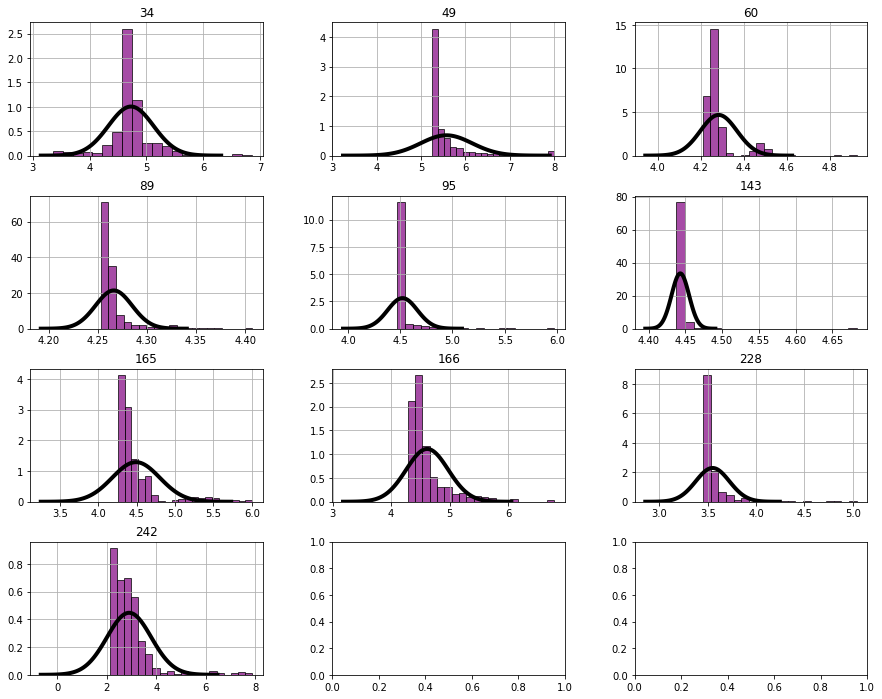

In [51]:
plot_hists(badIDs)

# modify path

In [52]:
import itertools
from celmech import Andoyer, Poincare
from celmech.resonances import resonant_period_ratios
from celmech.andoyer import get_num_fixed_points
from collections import OrderedDict

respath = '/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/stability/stabilitydataset/data/resonant/'
sapath = 'simulation_archives/runs/sa'

89
m1=2.6119070971141027e-07, m2=2.3546286895579865e-05, m3=4.421008165908252e-06
Particles [1, 2] collided at t = 1.86e+04
Pair 12: Zcross = 0.182, Z/Zcross = 0.104, delta a/RH = 6.33, Strongest Resonance (strength) = 9:7 (0.18)
Pair 13: Zcross = 0.481, Z/Zcross = 0.274, delta a/RH = 28.73, Strongest Resonance = None
Pair 23: Zcross = 0.253, Z/Zcross = 0.583, delta a/RH = 8.32, Strongest Resonance (strength) = 7:5 (0.51)


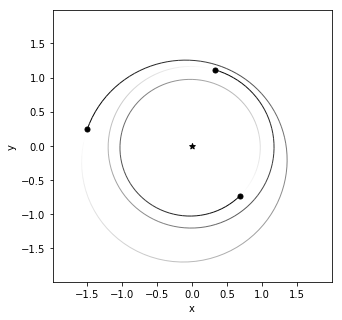

In [67]:
num=3
print(badIDs[num])
fig = info(badIDs[num])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:383: RuntimeWarning: invalid value encountered in double_scalars
No handles with labels found to put in legend.


Zsepouter = 0.0, Zsepinner = 0.0, fractional error = nan


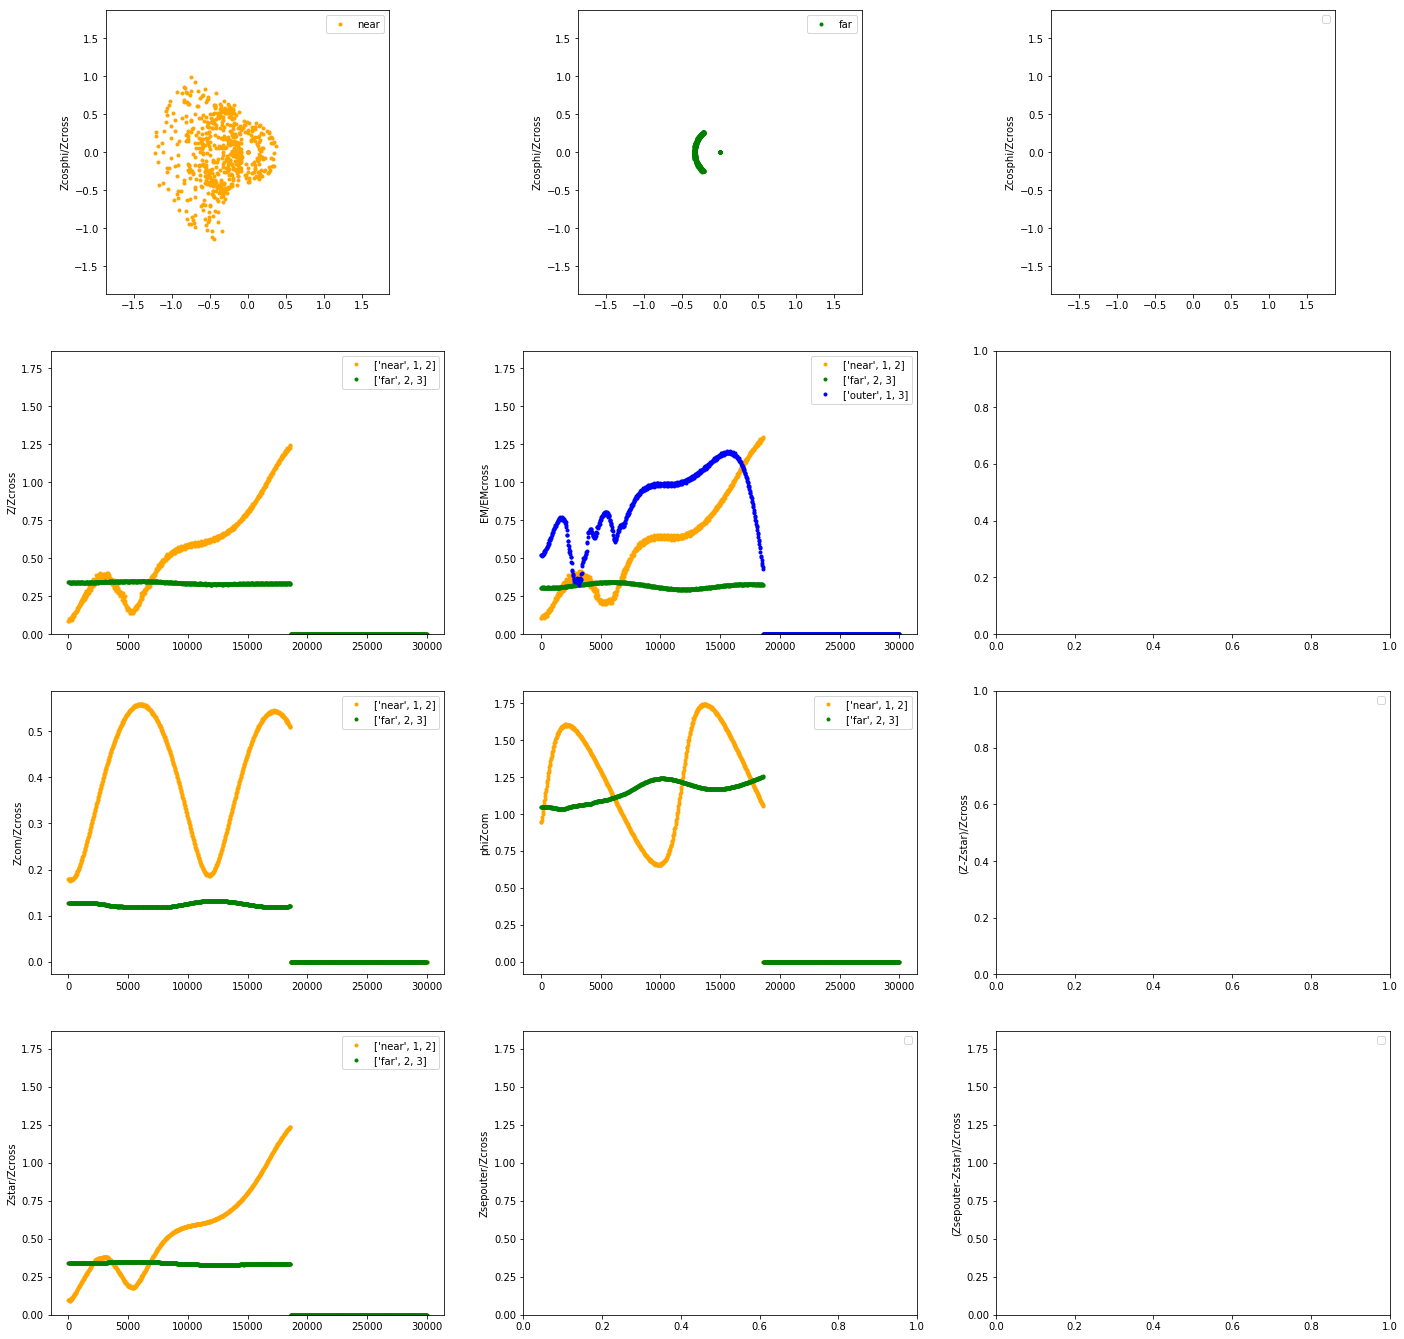

In [68]:
fig, features = plot(badIDs[num], Norbits=3e4)

In [70]:
good = df['KSpval'] > 1.e-2
df[good].shape

(115, 16)

In [71]:
goodIDs = df[good]['ID'].values
goodIDs[:12]

array([ 3,  5,  8, 14, 15, 19, 22, 23, 25, 26, 27, 28])

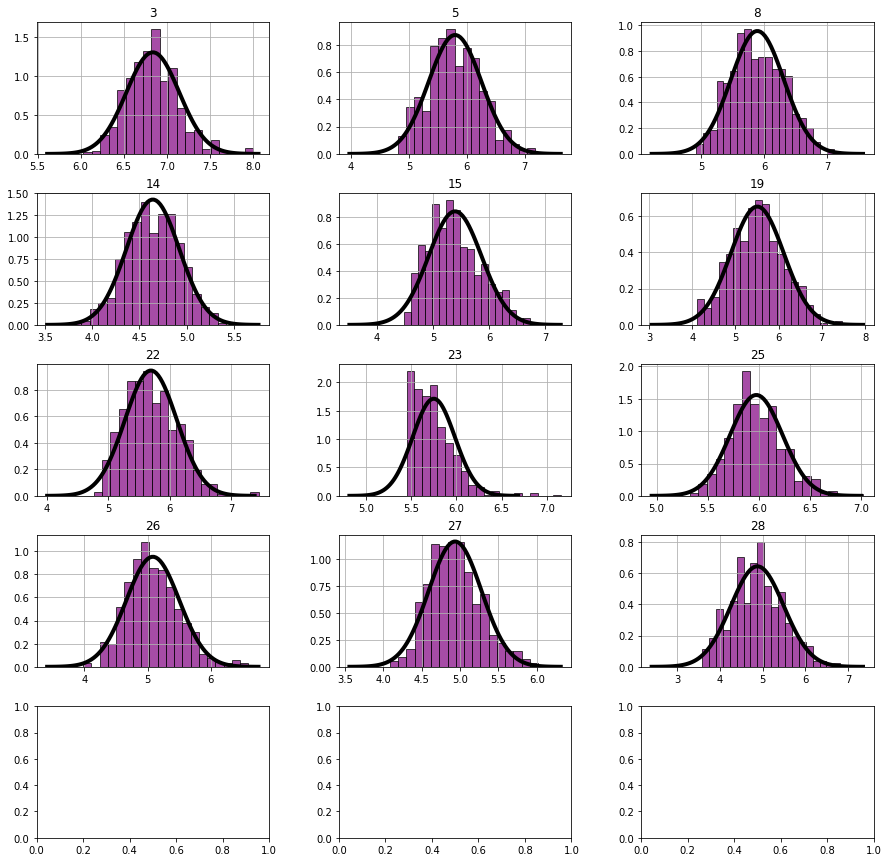

In [72]:
plot_hists(goodIDs[:12])

27
m1=6.786653507998936e-07, m2=2.9108900474808894e-05, m3=7.209876203697729e-07
Particles [2, 3] collided at t = 9.82e+04
Pair 12: Zcross = 0.093, Z/Zcross = 0.121, delta a/RH = 3.01, Strongest Resonance (strength) = 8:7 (2.65)
Pair 13: Zcross = 0.183, Z/Zcross = 0.004, delta a/RH = 16.33, Strongest Resonance (strength) = 9:7 (0.04)
Pair 23: Zcross = 0.082, Z/Zcross = 0.136, delta a/RH = 2.64, Strongest Resonance (strength) = 9:8 (2.92)


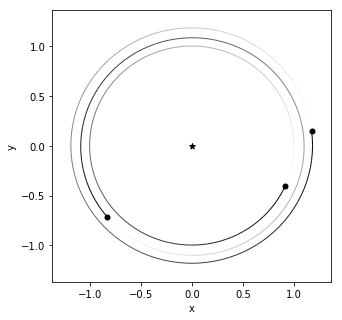

In [83]:
num=10
print(goodIDs[num])
fig = info(goodIDs[num])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Zsepouter = nan, Zsepinner = nan, fractional error = nan


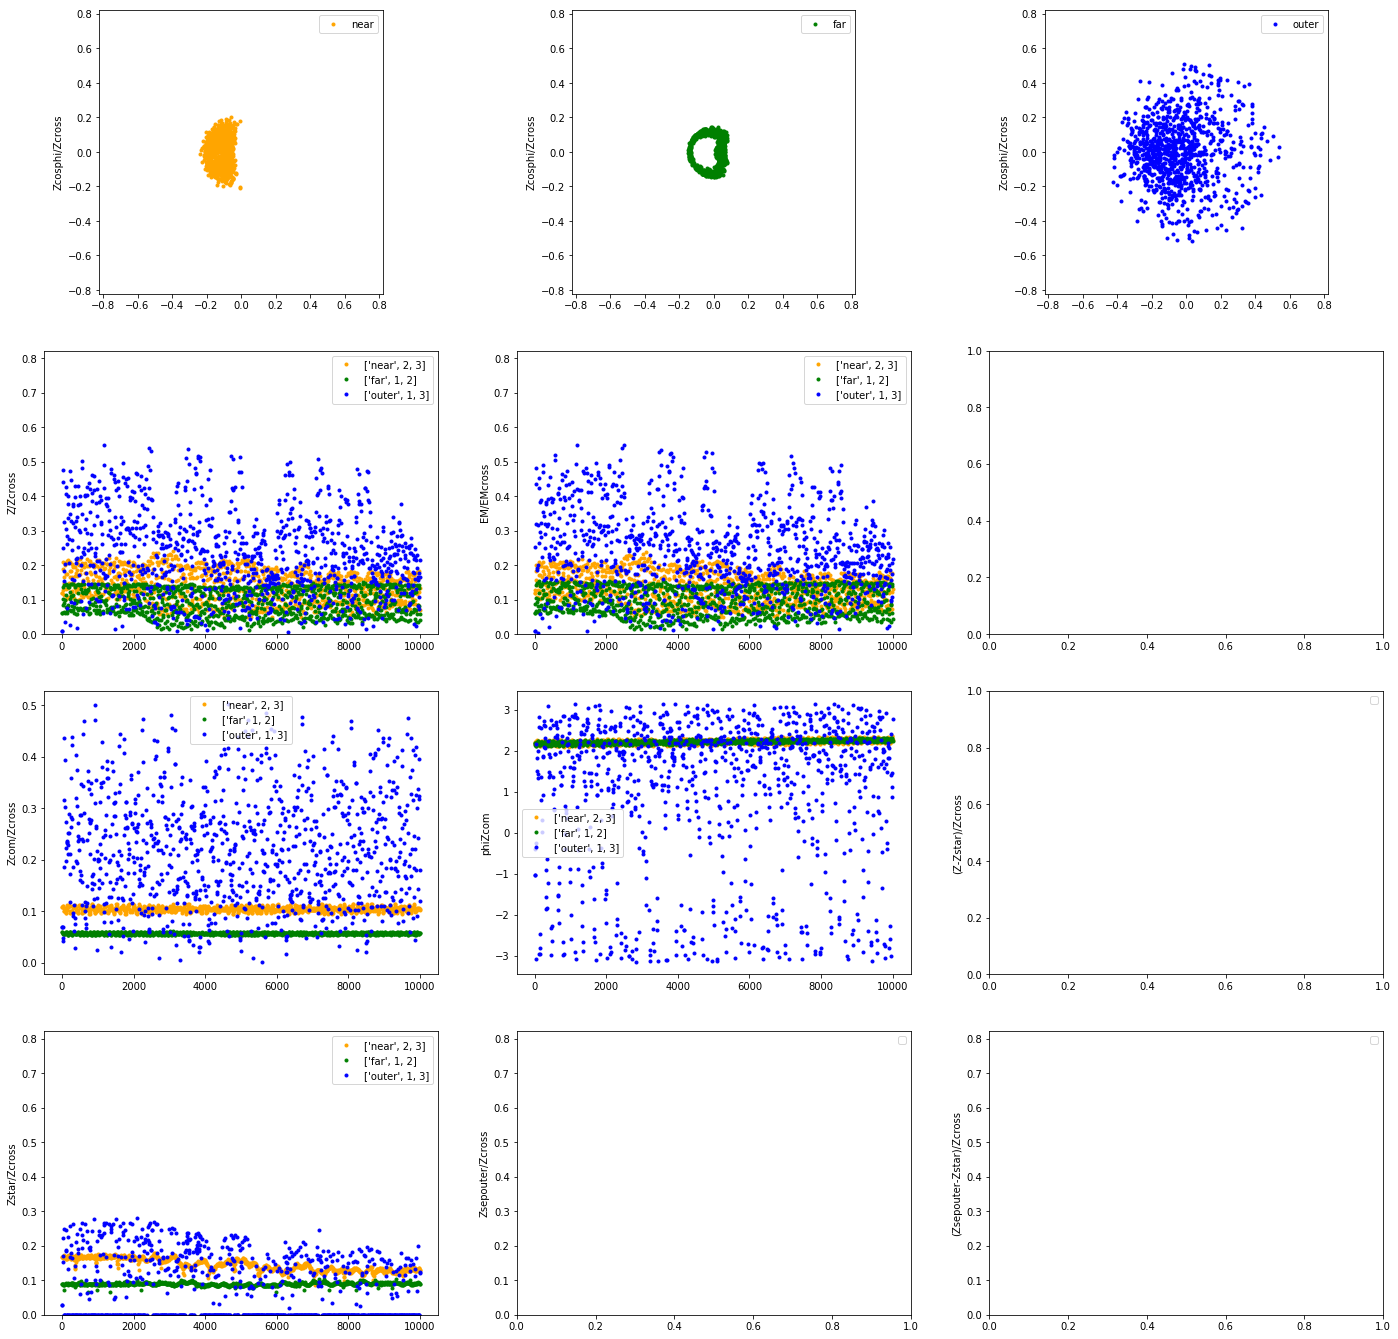

In [85]:
fig, features = plot(goodIDs[num], Norbits=1e4)

26
m1=4.125495725389648e-07, m2=9.12583829034091e-05, m3=6.342661838686886e-06
Particles [1, 2] collided at t = 8.70e+04
Pair 12: Zcross = 0.240, Z/Zcross = 0.354, delta a/RH = 5.32, Strongest Resonance (strength) = 4:3 (0.06)
Pair 13: Zcross = 0.586, Z/Zcross = 0.009, delta a/RH = 31.00, Strongest Resonance (strength) = 2:1 (0.13)
Pair 23: Zcross = 0.279, Z/Zcross = 0.287, delta a/RH = 6.06, Strongest Resonance (strength) = 3:2 (0.07)


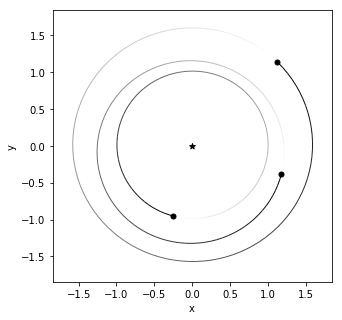

In [79]:
num=9
print(goodIDs[num])
fig = info(goodIDs[num])

Zsepouter = nan, Zsepinner = nan, fractional error = nan


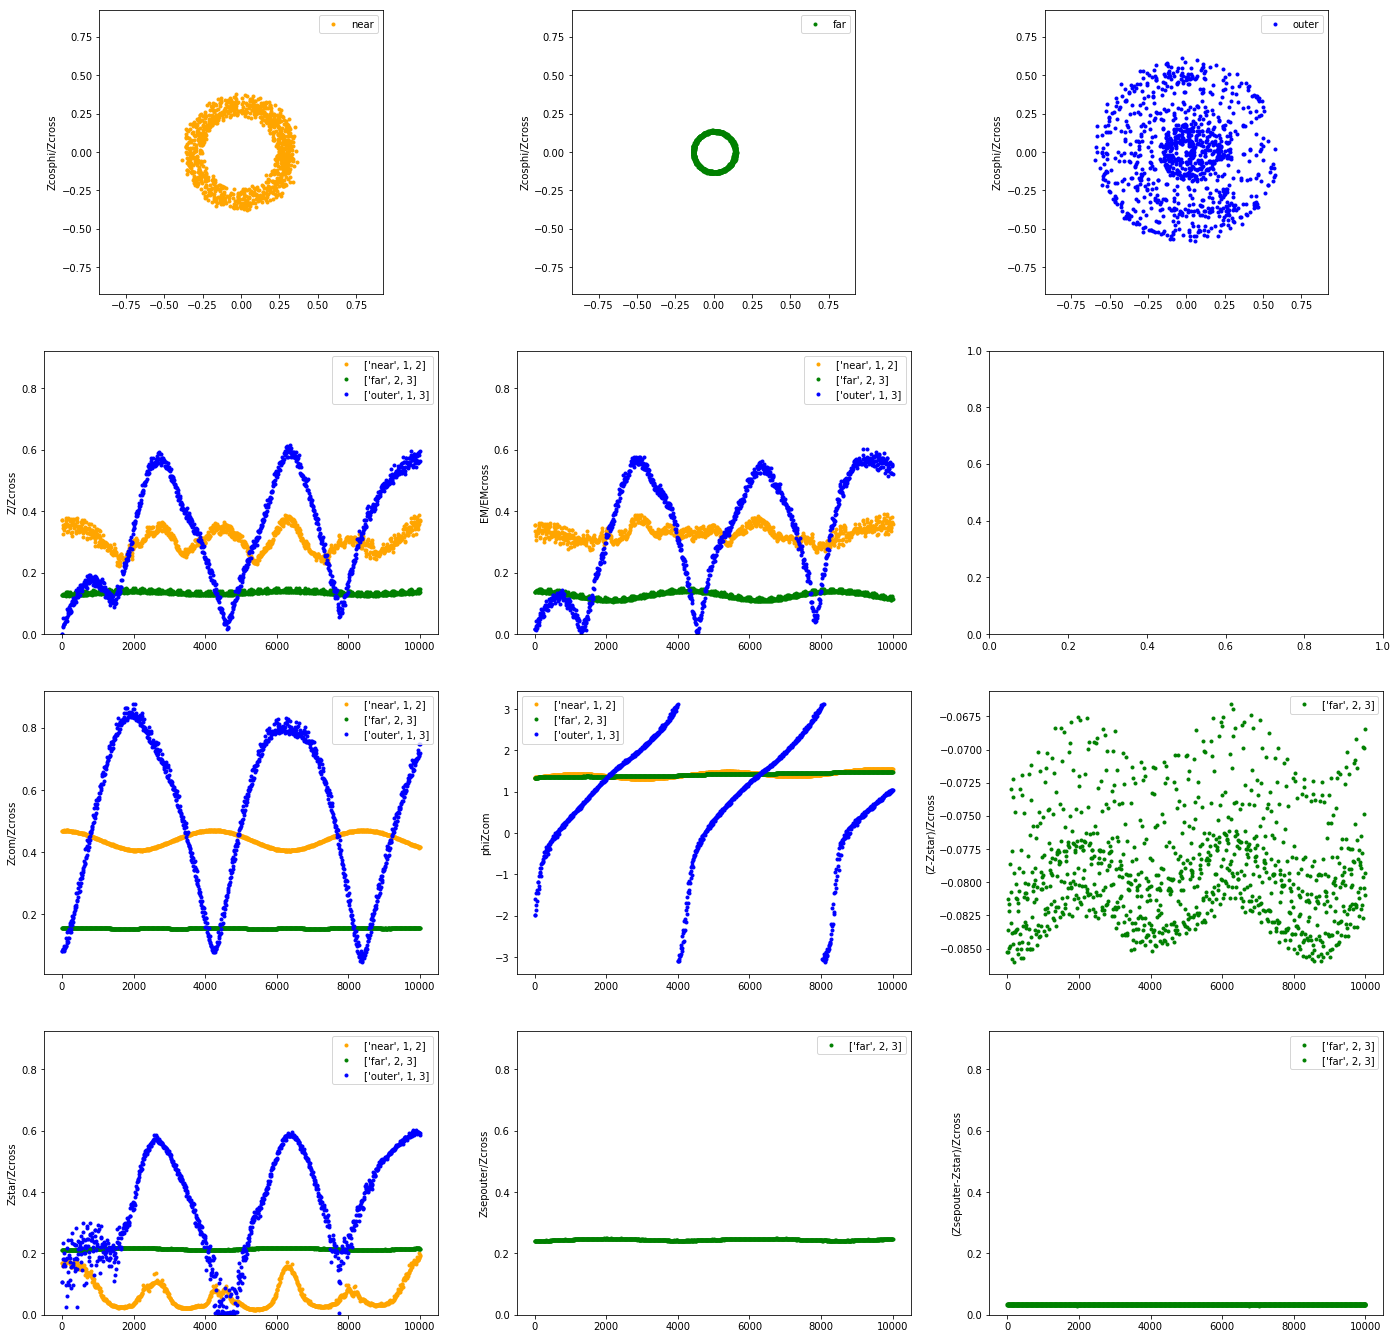

In [82]:
fig, features = plot(goodIDs[num], Norbits=1e4)

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


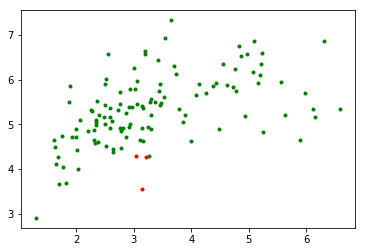

In [45]:
fig, ax = plt.subplots()
ax.plot(np.log10(df[good]['tlyap']), df[good]['Mean'], '.', c='g')
ax.plot(np.log10(df[bad]['tlyap']), df[bad]['Mean'], '.', c='r')

In [46]:
mask = ~((df['tlyap'].isnull()) | (df['tlyap'] < 0))

In [47]:
df[mask]

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
4      4     0.763205  5.687568  0.239838    0.010566     0.007649   
5      5     0.390180  5.797549  0.456784    0.020690     0.014837   
8      8     0.430419  5.891151  0.417529    0.018658     0.013478   
13    13     0.724655  4.644210  0.256174    0.011094     0.008051   
14    14     0.639085  4.641321  0.279061    0.012957     0.008821   
15    15     0.382438  5.394118  0.472255    0.021703     0.014858   
19    19     0.295983  5.506962  0.611722    0.027111     0.019352   
22    22     0.425517  5.696339  0.421975    0.019127     0.013652   
23    23     0.780911  5.750305  0.232983    0.010601     0.007417   
25    25     0.708144  5.975442  0.255860    0.011716     0.008396   
26    26     0.436987  5.083316  0.418902    0.019046     0.013127   
27    27     0.529363  4.935118  0.343702    0.015253     0.010944   
28    28     0.301414  4.877460  0.619135    0.026539     0.019711   
30    30     0.750973  6.173450  0.239089    0.010600     0.007596   
31    31     0.714843  6.869909  0.255006    0.011546     0.008441   
33    33     0.445646  4.651386  0.406428    0.018207     0.012839   
34    34     0.461570  4.728933  0.396513    0.017845     0.012435   
36    36     0.369225  4.931004  0.497212    0.022047     0.015651   
37    37     0.625319  4.911633  0.289780    0.012811     0.009268   
41    41     0.470433  5.790899  0.390495    0.017475     0.012192   
42    42     0.452535  5.189591  0.403972    0.017844     0.012708   
43    43     0.462096  5.344513  0.392046    0.017239     0.012694   
46    46     0.308615  5.461261  0.587545    0.026637     0.018660   
47    47     0.344504  6.003411  0.524986    0.024007     0.017052   
48    48     0.448620  5.489677  0.395368    0.017982     0.012691   
50    50     0.300856  4.387149  0.273375    0.008490     0.006142   
53    53     0.334635  5.357514  0.533059    0.024490     0.017052   
58    58     0.586017  5.371674  0.309164    0.013926     0.010016   
59    59     0.404838  5.204664  0.441557    0.020265     0.014400   
60    60          inf  4.283397  0.085474         inf          inf   
..   ...          ...       ...       ...         ...          ...   
224  243     0.380690  4.912682  0.472534    0.021217     0.015066   
226  245     0.397110  4.723748  0.459973    0.020373     0.014279   
228  250     0.407737  5.617890  0.449810    0.019900     0.014407   
229  251     0.394184  6.426724  0.461486    0.020706     0.015080   
231  257     0.532507  4.894347  0.336485    0.014978     0.010712   
232  259     0.491126  5.898470  0.365865    0.016312     0.011749   
235  264     0.422380  6.350148  0.426465    0.019829     0.013414   
236  266     0.404629  6.560110  0.453522    0.019848     0.014472   
238  270     0.727250  4.464086  0.251781    0.010888     0.008032   
239  272     0.525461  5.913730  0.342563    0.015252     0.010783   
241  278     0.362678  4.422379  0.501265    0.022469     0.015517   
243  282     0.346363  5.730171  0.523580    0.023287     0.016388   
244  283     0.419063  6.752771  0.440157    0.020380     0.014509   
245  284     0.491423  4.847709  0.364162    0.016618     0.011639   
246  286     0.255370  4.636039  0.717409    0.031823     0.022330   
248  289     0.493610  6.113421  0.365908    0.016405     0.011724   
249  291     0.605741  4.724523  0.302230    0.013919     0.009540   
250  294     0.349727  5.310981  0.515341    0.022807     0.016416   
251  296     0.614230  5.653659  0.293666    0.013059     0.009138   
252  297     0.379467  5.827556  0.483697    0.021525     0.015524   
253  299     0.527568  3.676061  0.342948    0.015538     0.010608   
254  301     0.471290  5.008531  0.384631    0.017180     0.012097   
255  302     0.294037  4.492774  0.616673    0.027879     0.019679   
256  303     0.462751  5.214226  0.400859    0.018020     0.012873   
258  306     0.421348  5.093764  0.433219    0.019268     0.013468   
260  308     0.5

In [48]:
df[df['tlyap'] < 0]

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
3      3     0.591132  6.837504  0.306543    0.013839     0.009772   
49    49     0.312790  5.570552  0.581446    0.025843     0.018131   
54    54          inf  6.219218  0.182219         inf          inf   
81    81     0.361525  5.788468  0.508666    0.022806     0.016386   
95    95          inf  4.520902  0.142438         inf          inf   
121  121     0.477162  5.870347  0.375277    0.017036     0.011958   
128  128     0.357425  7.004225  0.501646    0.022848     0.015969   
143  143          inf  4.443182  0.011909         inf          inf   
145  145     0.429980  6.874162  0.421680    0.019044     0.013695   
165  165     0.584598  4.491704  0.309658    0.013914     0.009969   
187  187     0.383301  6.330814  0.481227    0.021378     0.014853   
220  235     0.479411  6.695179  0.374774    0.016676     0.012092   
237  268     0.795704  4.906077  0.225167    0.010168     0.007310   
247  287     0.697283  6.345209  0.261552    0.011455     0.008297   

      Determinant  maxstddetrended     maxda         tlyap     megno  \
3    1.828421e-08         0.003333  0.000025 -2.849455e+06  2.027302   
49   2.192589e-07         0.009862  0.000006 -4.405068e+05  1.973721   
54            inf         0.013420  0.000275 -1.354260e+06  1.987025   
81   1.396242e-07         0.000299  0.000636 -1.853767e+05  1.725442   
95            inf         0.032531  0.002088 -9.927838e+04  2.132590   
121  4.148851e-08         0.009439  0.000117 -4.378190e+04  1.896677   
128  1.329251e-07         0.000344  0.000008 -6.056755e+04  1.950975   
143           inf         0.003962  0.000002 -2.559122e+06  2.000269   
145  6.798642e-08         0.000117  0.000026 -3.672510e+05  2.001426   
165  1.924203e-08         0.002102  0.001781 -8.616611e+04  2.001556   
187  1.005344e-07         0.001711  0.001329 -6.984974e+04  2.021824   
220  4.061180e-08         0.004154  0.000053 -2.577241e+06  1.999356   
237  5.516981e-09         0.005930  0.000157 -1.472049e+05  1.512917   
247  9.033802e-09         0.005375  0.000609 -6.352986e+05  2.000696   

          mind      maxm        KSpval           AMD    AMDerr  
3    10.568203  0.000047  4.031026e-01  2.050094e-06  0.004522  
49    0.213552  0.000002  5.088269e-20  8.975162e-09  0.001793  
54    0.841001  0.000025  1.907103e-01  1.455654e-07  0.023929  
81    4.032183  0.000005  2.491203e-01  3.841621e-07  0.001492  
95   -1.372703  0.000026  9.937725e-36  4.735429e-07  0.024951  
121   5.345291  0.000026  6.019153e-01  2.908464e-07  0.021289  
128   0.584682  0.000003  3.599029e-01  1.569356e-07  0.000588  
143  -4.151499  0.000075  2.458719e-25  8.563109e-08  0.007228  
145   4.345451  0.000016  9.307144e-01  5.840542e-09  0.002847  
165   7.103477  0.000077  8.877114e-14  3.186385e-05  0.003915  
187   2.356098  0.000026  8.097301e-04  1.395744e-06  0.001407  
220   3.407996  0.000021  5.491662e-01  6.048230e-07  0.007634  
237   1.558254  0.000040  2.245847e-02  4.007905e-07  0.000752  
247  11.053956  0.000058  1.237817e-01  2.923873e-06  0.058654

In [49]:
df.head(20)

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
3    3     0.591132  6.837504  0.306543    0.013839     0.009772   
4    4     0.763205  5.687568  0.239838    0.010566     0.007649   
5    5     0.390180  5.797549  0.456784    0.020690     0.014837   
8    8     0.430419  5.891151  0.417529    0.018658     0.013478   
13  13     0.724655  4.644210  0.256174    0.011094     0.008051   
14  14     0.639085  4.641321  0.279061    0.012957     0.008821   
15  15     0.382438  5.394118  0.472255    0.021703     0.014858   
19  19     0.295983  5.506962  0.611722    0.027111     0.019352   
22  22     0.425517  5.696339  0.421975    0.019127     0.013652   
23  23     0.780911  5.750305  0.232983    0.010601     0.007417   
25  25     0.708144  5.975442  0.255860    0.011716     0.008396   
26  26     0.436987  5.083316  0.418902    0.019046     0.013127   
27  27     0.529363  4.935118  0.343702    0.015253     0.010944   
28  28     0.301414  4.877460  0.619135    0.026539     0.019711   
30  30     0.750973  6.173450  0.239089    0.010600     0.007596   
31  31     0.714843  6.869909  0.255006    0.011546     0.008441   
33  33     0.445646  4.651386  0.406428    0.018207     0.012839   
34  34     0.461570  4.728933  0.396513    0.017845     0.012435   
36  36     0.369225  4.931004  0.497212    0.022047     0.015651   
37  37     0.625319  4.911633  0.289780    0.012811     0.009268   

     Determinant  maxstddetrended     maxda         tlyap       megno  \
3   1.828421e-08         0.003333  0.000025 -2.849455e+06    2.027302   
4   6.523258e-09         0.013348  0.000006  1.830745e+04    2.547765   
5   9.424556e-08         0.004048  0.000038  1.031647e+03   11.419005   
8   6.323880e-08         0.016062  0.000025  2.833805e+03    5.970266   
13  7.978389e-09         0.018841  0.000401  7.624774e+05    2.003783   
14  1.304667e-08         0.002420  0.001414  2.055406e+02   50.382579   
15  1.039830e-07         0.015202  0.000586  9.292317e+02   10.565362   
19  2.751876e-07         0.002336  0.000608  7.343320e+01  125.345182   
22  6.817937e-08         0.092185  0.000016  9.572798e+05    1.979591   
23  6.182027e-09         0.007637  0.000040  5.983512e+04    1.901176   
25  9.672733e-09         0.000742  0.000142  1.152944e+03    9.616110   
26  6.248020e-08         0.041285  0.000525  2.158295e+02   40.326338   
27  2.786213e-08         0.007413  0.000948  8.286414e+02   13.865694   
28  2.731851e-07         0.013089  0.000088  2.034900e+02   51.513165   
30  6.482261e-09         0.006803  0.000074  1.167320e+05    1.973319   
31  9.499924e-09         0.007796  0.000009  1.206700e+05    2.008418   
33  5.463861e-08         0.004566  0.000008  1.267567e+03    8.759101   
34  4.924531e-08         0.001406  0.000149  5.726541e+01  164.278415   
36  1.187785e-07         0.019919  0.000501  1.743474e+03    7.076767   
37  1.408161e-08         0.001468  0.000368  6.583275e+02   20.386580   

         mind          maxm        KSpval           AMD    AMDerr  
3   10.568203  4.704639e-05  4.031026e-01  2.050094e-06  0.004522  
4    1.718754  4.655616e-05  1.329515e-03  1.234549e-07  0.016722  
5    2.473388  3.920461e-06  9.307144e-01  3.767014e-08  0.005825  
8    0.543701  7.707754e-05  7.090913e-01  1.805307e-06  0.006754  
13  -3.291228  1.137036e-05  2.183069e-04  2.787662e-07  0.030200  
14   2.093538  1.031784e-06  9.762302e-01  1.270778e-08  0.017578  
15   1.985335  4.916182e-05  3.599029e-01  7.279352e-07  0.104206  
19   1.769635  1.494853e-06  9.571669e-01  2.822458e-08  0.044321  
22   1.305332  9.905857e-05  6.555503e-01  5.667998e-06  0.000885  
23  -0.524154  2.731637e-05  1.012521e-02  4.264883e-09  0.013742  
25   0.532578  2.093477e-06  5.491662e-01  4.090652e-08  0.005084  
26   3.640210  9.125842e-05  6.019153e-01  1.537002e-06  0.019540  
27   1.595838  2.910892e-05  7.613652e-01  7.123558e-09  0.340637  
28   1.940589  6.191315e-06  7.613652e-01  1.046371e-08  0.058277  
30   3.422549  2.3354

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


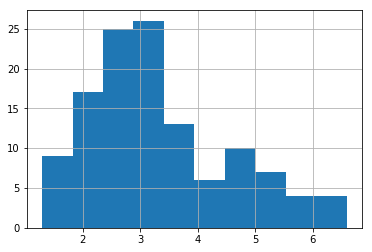

In [50]:
np.log10(df['tlyap']).hist()

         Mean       tlyap   AMDerr    KSpval
195  4.915765  566.626099  0.02873  0.106292


/mnt/ssd/workspace/rebound/rebound/simulationarchive.py:89: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/ssd/workspace/rebound/rebound/simulationarchive.py:138: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


0.0015776187203182797 633.8667176808432


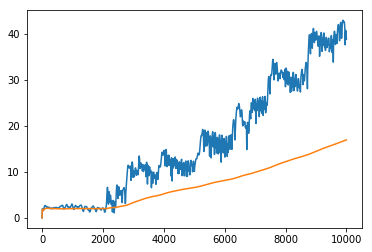

In [51]:
system = 195
print(df.loc[df['ID']==system, ['Mean', 'tlyap', 'AMDerr', 'KSpval']])
Ys, megnos, times, sim, d, e = lyap(system)
fig, ax = plt.subplots()
ax.plot(times, Ys)
ax.plot(times, megnos)

In [50]:
%%time
Nshadows=50
times, e = es(system, Nshadows)

fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
CPU times: user 2min 10s, sys: 47.8 ms, total: 2min 10s
Wall time: 2min 10s


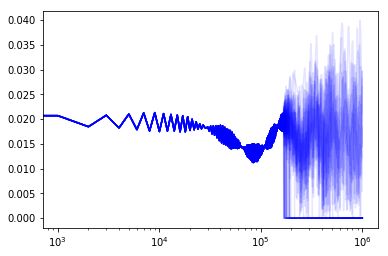

In [247]:
fig, ax = plt.subplots()
for i in range(Nshadows):
    ax.plot(times, e[i,:], c='b', alpha=0.1)
    
ax.set_xscale('log')
#ax.set_ylim([0, 0.5])
#ax.set_xlim([1,5e4])

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


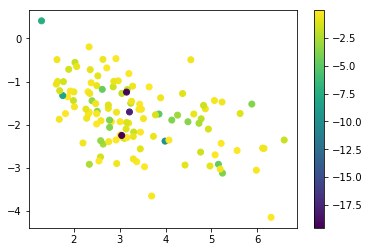

In [52]:
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('RdYlBu')
cb = ax.scatter(np.log10(df['tlyap']), np.log10(df['AMDerr']), c=np.log10(df['KSpval']))
plt.colorbar(cb)
#ax.plot(np.linspace(2,7,100), np.linspace(2,7,100))
#ax.set_yscale('log')
#ax.set_ylim([1e-5, 1])

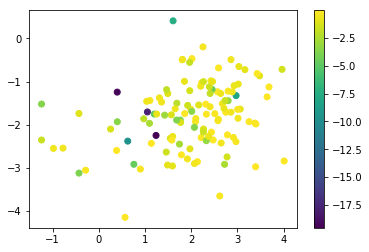

In [53]:
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('RdYlBu')
cb = ax.scatter(df[mask]['Mean'] - np.log10(df[mask]['tlyap']), np.log10(df[mask]['AMDerr']), c=np.log10(df[mask]['KSpval']))
plt.colorbar(cb)
#ax.plot(np.linspace(2,7,100), np.linspace(2,7,100))
#ax.set_yscale('log')
#ax.set_ylim([1e-5, 1])

In [54]:
df.loc[49]

ID                 4.900000e+01
Probability        3.127898e-01
Mean               5.570552e+00
Sigma              5.814462e-01
Mean_Error         2.584300e-02
Sigma_Error        1.813100e-02
Determinant        2.192589e-07
maxstddetrended    9.862335e-03
maxda              6.168485e-06
tlyap             -4.405068e+05
megno              1.973721e+00
mind               2.135521e-01
maxm               1.736716e-06
KSpval             5.088269e-20
AMD                8.975162e-09
AMDerr             1.792952e-03
Name: 49, dtype: float64

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Log Instability time')

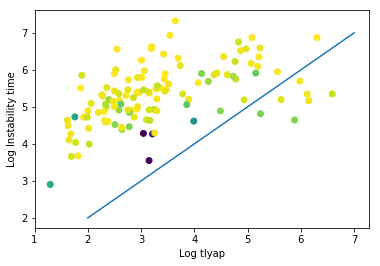

In [55]:
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('RdYlBu')
cb = ax.scatter(np.log10(df['tlyap']), df['Mean'], c=np.log10(df['KSpval']))
ax.plot(np.linspace(2,7,100), np.linspace(2,7,100))
ax.set_xlabel('Log tlyap')
ax.set_ylabel('Log Instability time')

# Calculate instability time / secular timescale estimate?

# Bottom left corner is bad distributions mostly.

Short instabiilties, and not many lyapunov times. Makes sense. 

4 quadrants

stable chaotic / stable regular
unstable regular (secular) / unstable chaotic

Plot e(t) for all realizations in distribution
Compare to looking at 2 samples from random dataset (real/shadow). This would be doable for whole dataset

Check top right of plot for examples of stable chaotic systems
Check middle right of plot for stable regular

bottom right of plot is unstable on long timescales (> 5.5), but with very long Lyapunov time? Check these systems
Check blue/green points on upper left of plot. Unstable quickly, many Lyapunov times, but weird distribution?
Check green systems toward top right



In [62]:
df['logNlyapToInst'] = df['Mean'] - np.log10(df['tlyap'])
mask = (df['Mean'] > 4) & (df['tlyap'] < 3500)
mask.sum()

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


93

Text(0, 0.5, 'Log # of lyapunov times before instability')

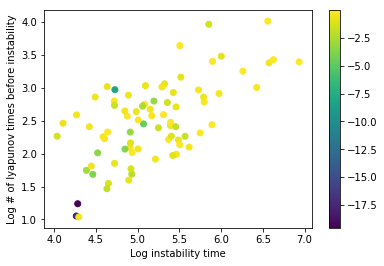

In [64]:
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('RdYlBu')
cb = ax.scatter(df[mask]['Mean'], df[mask]['logNlyapToInst'], c=np.log10(df[mask]['KSpval']))
plt.colorbar(cb)
ax.set_xlabel('Log instability time')
ax.set_ylabel('Log # of lyapunov times before instability')

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Log # of lyapunov times before instability')

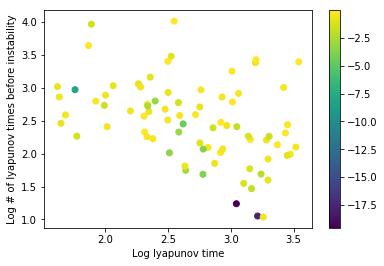

In [65]:
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('RdYlBu')
cb = ax.scatter(np.log10(df[mask]['tlyap']), df[mask]['logNlyapToInst'], c=np.log10(df[mask]['KSpval']))
plt.colorbar(cb)
ax.set_xlabel('Log lyapunov time')
ax.set_ylabel('Log # of lyapunov times before instability')

In [81]:
df[(df['KSpval'] > 1.e-10) & (df['logNlyapToInst'] < 1.5) & (df['tlyap'] < 3500)]

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
168  168     0.632976  4.295825  0.286153    0.013231     0.009235   
205  206     0.405541  4.633188  0.452749    0.020191     0.014080   

      Determinant  maxstddetrended     maxda        tlyap     megno      mind  \
168  1.486183e-08         0.006476  0.000280  1812.374091  6.833639  1.549216   
205  8.080662e-08         0.009282  0.000092  1464.068208  8.661778 -0.582357   

         maxm    KSpval           AMD    AMDerr  logNlyapToInst  
168  0.000062  0.403103  1.405747e-07  0.034993        1.037577  
205  0.000009  0.012432  1.389345e-08  0.065130        1.467627

In [70]:
df[(df['KSpval'] > 1.e-10) & (df['KSpval'] < 1.e-5)]

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
34    34     0.461570  4.728933  0.396513    0.017845     0.012435   
166  166     0.495002  4.616113  0.359195    0.016498     0.011173   
223  242     0.206341  2.903427  0.890806    0.038853     0.027763   

      Determinant  maxstddetrended     maxda        tlyap       megno  \
34   4.924531e-08         0.001406  0.000149    57.265412  164.278415   
166  3.391284e-08         0.002969  0.000011  9753.924523    2.759174   
223  1.163594e-06         0.016897  0.000615    19.757641   13.383814   

         mind          maxm        KSpval           AMD    AMDerr  \
34   0.819786  6.647966e-07  6.677306e-09  1.181382e-08  0.047472   
166  0.590492  1.076896e-06  2.422192e-10  1.524410e-08  0.004178   
223  0.836727  7.688246e-05  4.330748e-08  9.861424e-08  2.560856   

     logNlyapToInst  
34         2.971040  
166        0.626933  
223        1.607691

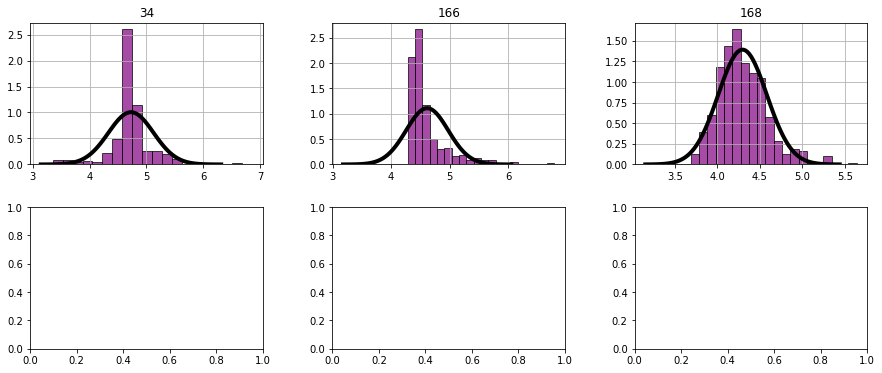

In [86]:
plot_hists([34, 166, 168])

0.0005082551872140916 1967.5155810633596


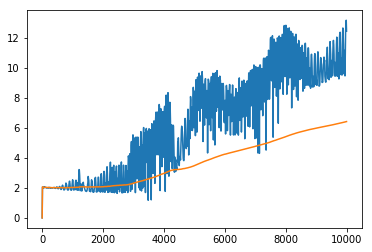

In [82]:
Ys, megnos, times, sim, d, e = lyap(168)
fig, ax = plt.subplots()
ax.plot(times, Ys)
ax.plot(times, megnos)

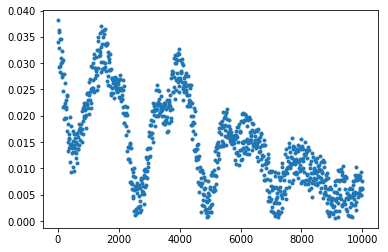

In [83]:
fig, ax = plt.subplots()
ax.plot(times, e, '.')

In [87]:
%%time
Nshadows=50
times, e = es(168, Nshadows, tmax=1.e5)

fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
CPU times: user 40.1 s, sys: 45 ms, total: 40.2 s
Wall time: 40.1 s


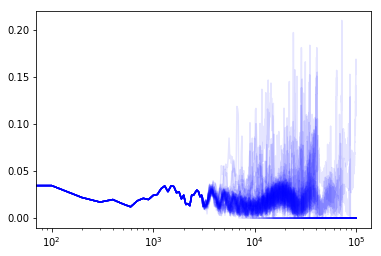

In [88]:
fig, ax = plt.subplots()
for i in range(Nshadows):
    ax.plot(times, e[i,:], c='b', alpha=0.1)
    
ax.set_xscale('log')
#ax.set_ylim([0, 0.5])
#ax.set_xlim([1,5e4])

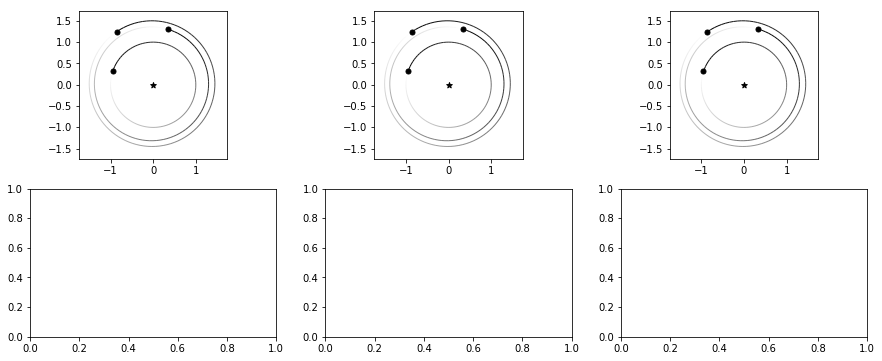

In [90]:
plotorbits([168]*3)

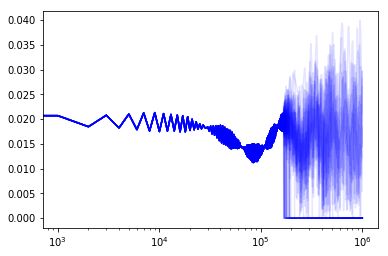

In [247]:
fig, ax = plt.subplots()
for i in range(Nshadows):
    ax.plot(times, e[i,:], c='b', alpha=0.1)
    
ax.set_xscale('log')
#ax.set_ylim([0, 0.5])
#ax.set_xlim([1,5e4])

IndexError: index 0 is out of bounds for axis 0 with size 0

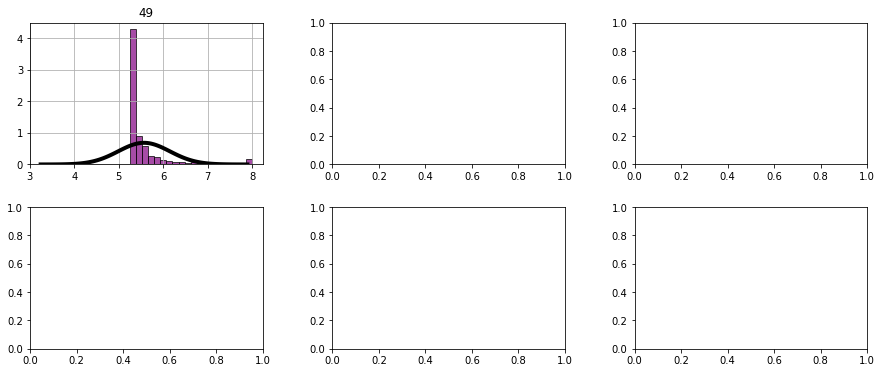

In [243]:
plot_hists([49, 228, 228])

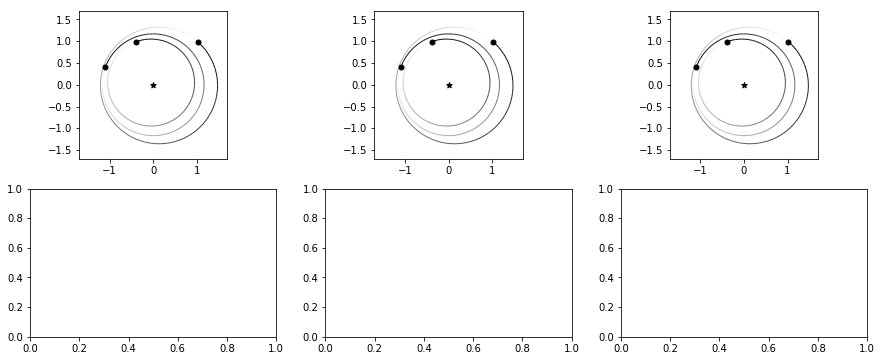

In [52]:
plotorbits([2364]*3)

We have two types of chaotic orbits. Chaotic (short Lyap time) and diffusive, like the one below. This allows the instability time distribution to lognormalize out:

nan


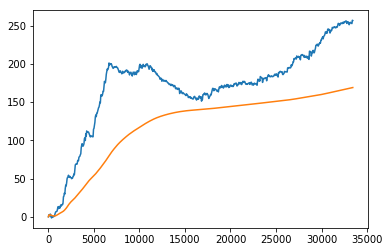

In [259]:
Ys, megnos, times, sim, d, e = lyap(good.loc[19])
fig, ax = plt.subplots()
ax.plot(times, Ys)
ax.plot(times, megnos)

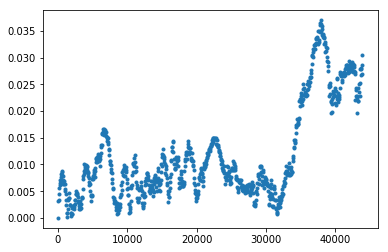

In [260]:
fig, ax = plt.subplots()
ax.plot(times, e, '.')

In [249]:
%%time
Nshadows=50
times, e = es(good.loc[19], Nshadows)

CPU times: user 25.7 s, sys: 4 ms, total: 25.7 s
Wall time: 25.7 s


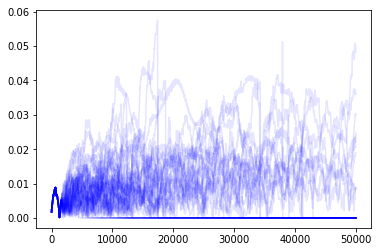

In [251]:
fig, ax = plt.subplots()
for i in range(Nshadows):
    ax.plot(times, e[i,:], c='b', alpha=0.1)

Here is a chaotic (short Lyapunov time, 300 orbits), but non-diffusive. Chaotic but doesn't go anywhere. I think it just secularly evolves into crossing. How can we evaluate this in a short integration? Integrate two separate trajectories 

nan


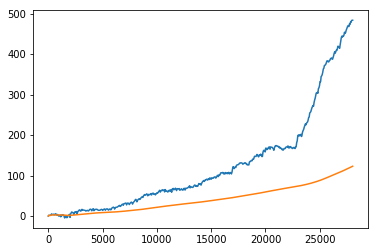

In [261]:
Ys, megnos, times, sim, d, e = lyap(weird.loc[190])
fig, ax = plt.subplots()
ax.plot(times, Ys)
ax.plot(times, megnos)

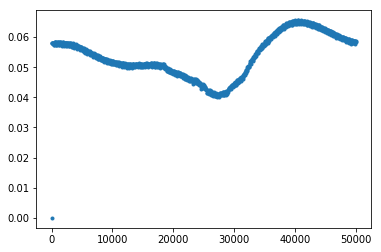

In [262]:
fig, ax = plt.subplots()
ax.plot(times, e, '.')

In [254]:
%%time
Nshadows=50
times, e = es(weird.loc[190], Nshadows)

CPU times: user 24.8 s, sys: 20 ms, total: 24.9 s
Wall time: 24.9 s


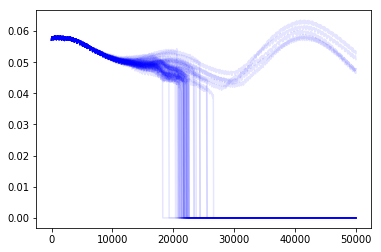

In [255]:
fig, ax = plt.subplots()
for i in range(Nshadows):
    ax.plot(times, e[i,:], c='b', alpha=0.1)

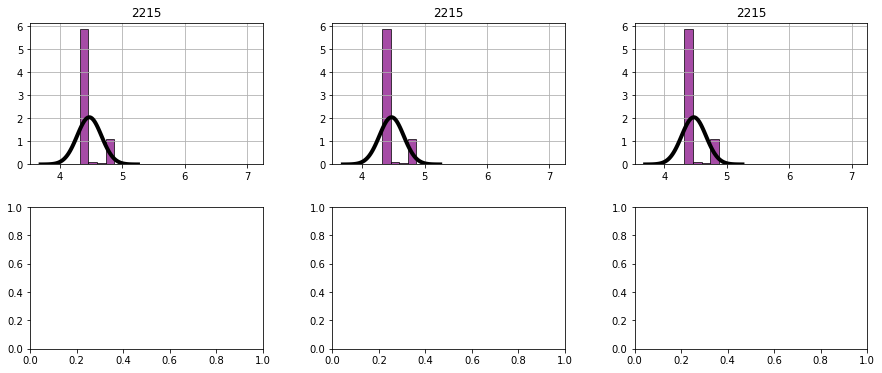

In [225]:
plot_hists([2215, 2215, 2215])

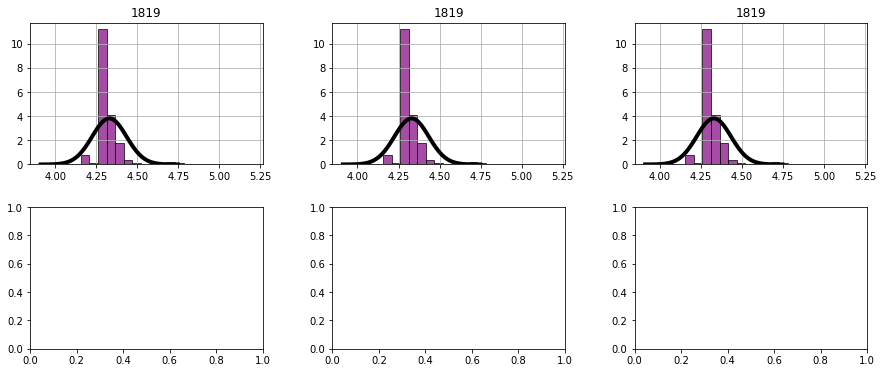

In [214]:
plot_hists([1819, 1819, 1819])

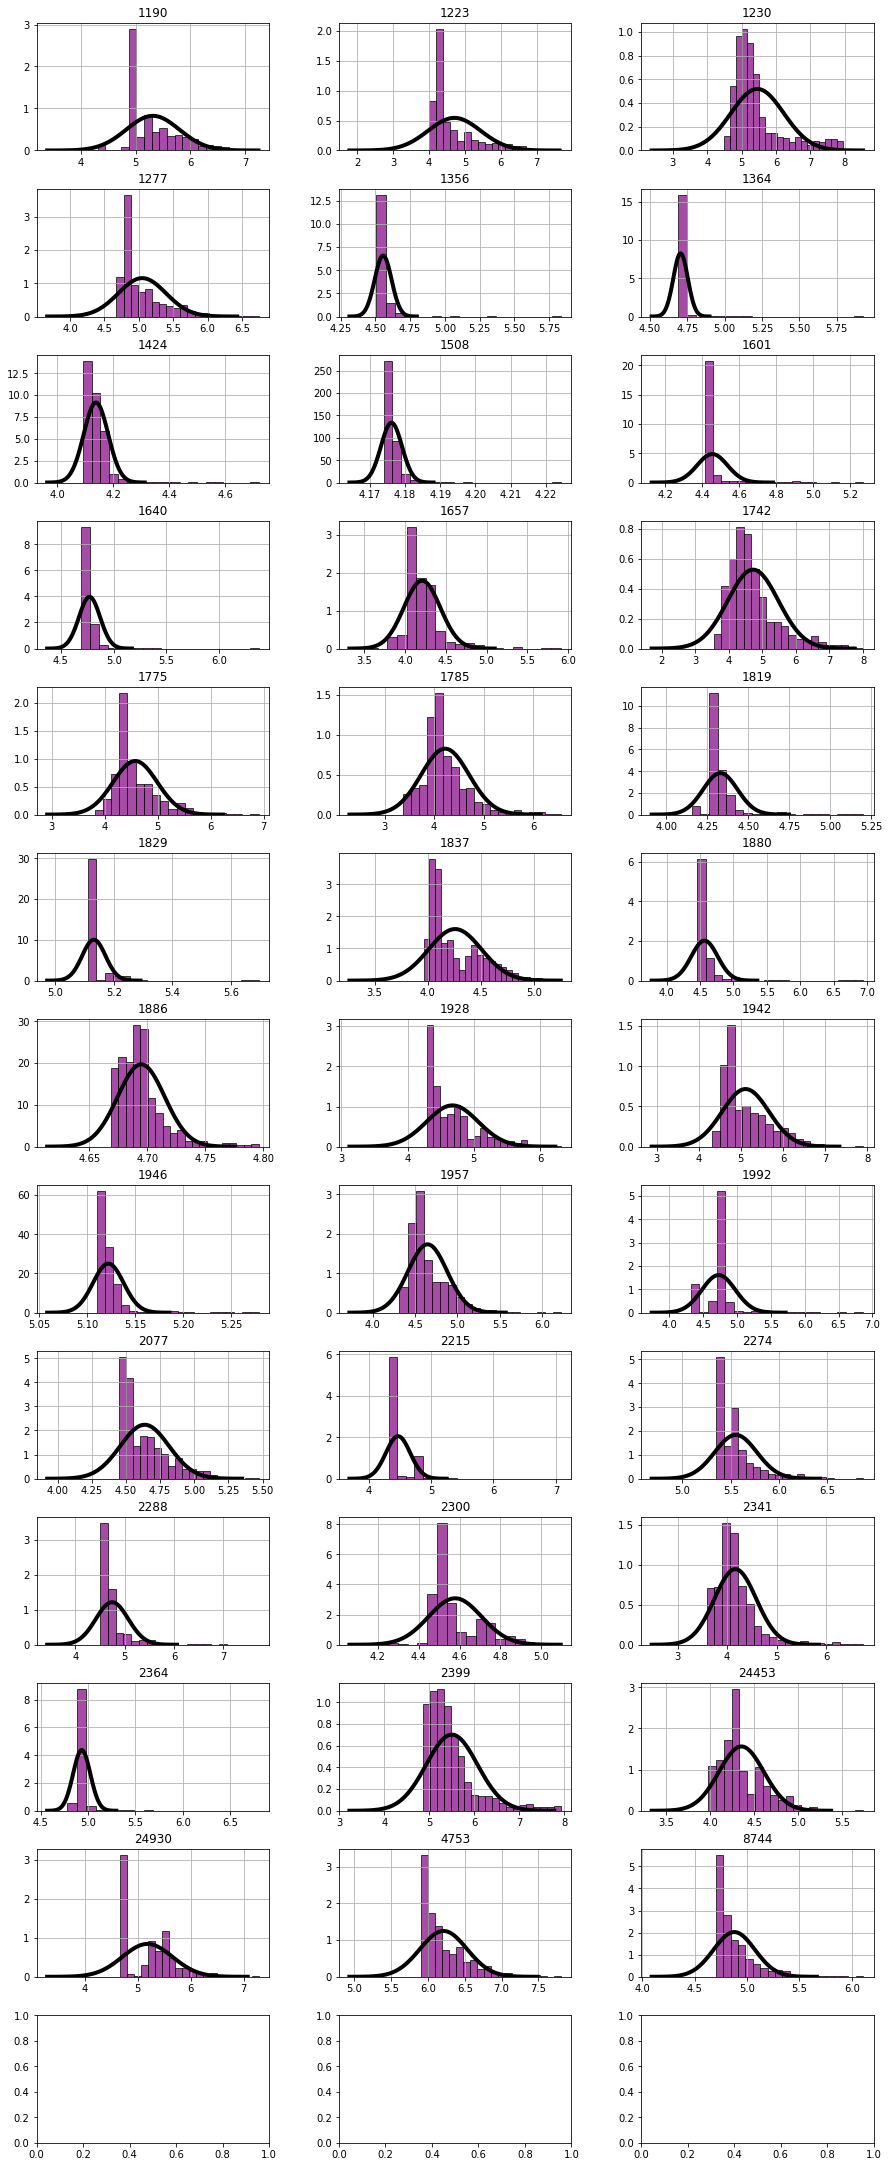

In [240]:
plot_hists(df[bad]['ID'].values)

In [188]:
def plotecc(ID, tmax=1.e4):
    print(df[df['ID'] == ID]['Mean'])
    fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
    file = "/mnt/scratch-lustre/nhussain/data/distributions/Sys_{0}_1e8/initial_conditions/ic{1:0=7d}.bin".format(ID, 0)
    sim = rebound.Simulation.from_file(file)
    sim.init_megno()
    rebound.OrbitPlot(sim)
    ps = sim.particles
    RH12 = ((ps[1].m+ps[2].m)/3.)**(1./3.)*ps[1].a
    RH23 = ((ps[2].m+ps[3].m)/3.)**(1./3.)*ps[2].a
    Nout = 1000
    times = np.linspace(0, tmax, Nout)
    e1, e2, e3 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
    a1, a2, a3 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
    d12, d32 = np.zeros(Nout), np.zeros(Nout)
    
    Ys, megnos = np.zeros(Nout), np.zeros(Nout)
    
    a10 = sim.particles[1].a
    a20 = sim.particles[2].a
    a30 = sim.particles[3].a
    print('m', sim.particles[1].m, sim.particles[2].m, sim.particles[3].m)
    print('Pratio', sim.particles[2].P/sim.particles[1].P, sim.particles[3].P/sim.particles[2].P, sim.particles[3].P/sim.particles[1].P)
    for i, time in enumerate(times):
        try:
            sim.integrate(time)
        
        except:
            print(sim.t)
            break
        
        try:
            Ys[i] = sim.megno_Ys/sim.t
            megnos[i] = sim.calculate_megno()
        except:
            pass
        e1[i] = sim.particles[1].e
        e2[i] = sim.particles[2].e
        e3[i] = sim.particles[3].e
        a1[i] = sim.particles[1].a
        a2[i] = sim.particles[2].a
        a3[i] = sim.particles[3].a
        de12 = np.sqrt((ps[2].e*np.cos(ps[2].pomega)-ps[1].e*np.cos(ps[1].pomega))**2 + (ps[2].e*np.sin(ps[2].pomega)-ps[1].e*np.sin(ps[1].pomega))**2)
        de32 = np.sqrt((ps[2].e*np.cos(ps[2].pomega)-ps[3].e*np.cos(ps[3].pomega))**2 + (ps[2].e*np.sin(ps[2].pomega)-ps[3].e*np.sin(ps[3].pomega))**2)
        da12 = (ps[2].a-ps[1].a)/ps[1].a
        da32 = (ps[3].a-ps[2].a)/ps[2].a
        d12[i] = (da12-de12)/RH12-1.
        d32[i] = (da32-de32)/RH23-1.
    
    axarr[0,0].plot(times[e1!=0], e1[e1!=0], label='e1')
    axarr[0,0].plot(times[e1!=0], e2[e1!=0], label='e2')
    axarr[0,0].plot(times[e1!=0], e3[e1!=0], label='e3')
    axarr[0,1].plot(times[e1!=0], (a1[e1!=0]-a10)/a10, label='da1')
    axarr[0,1].plot(times[e1!=0], (a2[e1!=0]-a20)/a20, label='da2')
    axarr[0,1].plot(times[e1!=0], (a3[e1!=0]-a30)/a30, label='da3')
    
    if d12[e1!=0].min() < d32[e1!=0].min():
        axarr[1,0].plot(times[e1!=0], d12[e1!=0], '.', label='d12')
        s='12'
    else:
        axarr[1,0].plot(times[e1!=0], d32[e1!=0], '.', label='d32')
        s='23'
    print(feat.loc[ID, ['EMmed', 'EMmax', 'EMdrift', 'EMdetrendedstd', 'EMrollingstd', 'DiffcoeffEM', 'medvarEM']])
    
    axarr[1,1].plot(times, Ys, '.')
    axarr[1,1].plot(times, megnos, '.')
    axarr[1,1].plot([0, tmax], [2, 2], '.')

    axarr[1,1].set_xscale('log')
    axarr[1,1].set_yscale('log')

    axarr[0,1].set_yscale('log')
    axarr[0,0].legend()
    axarr[0,1].legend()
    axarr[1,0].legend()
    
    p1 = np.poly1d(np.polyfit(times[e1!=0], e1[e1!=0], 3))
    p2 = np.poly1d(np.polyfit(times[e1!=0], e2[e1!=0], 3))
    p3 = np.poly1d(np.polyfit(times[e1!=0], e3[e1!=0], 3))

    m1 = p1(times[e1!=0])
    m2 = p2(times[e1!=0])
    m3 = p3(times[e1!=0])
    
    std1 = pd.Series(e1[e1!=0]-m1).std()
    std2 = pd.Series(e2[e1!=0]-m2).std()
    std3 = pd.Series(e3[e1!=0]-m3).std()
    std = max(max(std1, std2), std3)
    
    axarr[0,0].plot(times[e1!=0], m1)
    axarr[0,0].plot(times[e1!=0], m2)
    axarr[0,0].plot(times[e1!=0], m3)
    
    print('std', std1, std2, std3)
    
    da1 = np.median((a1[e1!=0]-a10)/a10)
    da2 = np.median((a2[e1!=0]-a20)/a20)
    da3 = np.median((a3[e1!=0]-a30)/a30)
    
    da = max(max(da1, da2), da3)
    lyap = 1/sim.calculate_lyapunov()
    mind = min(d12[e1!=0].min(), d32[e1!=0].min())
    maxm = max(max(ps[1].m, ps[2].m), ps[3].m)
    print('final time', sim.t)
    rebound.OrbitPlot(sim)
    return axarr, std, da, lyap, mind, maxm, sim

In [188]:
def plotecc(ID, tmax=1.e4):
    print(df[df['ID'] == ID]['Mean'])
    fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
    file = "/mnt/scratch-lustre/nhussain/data/distributions/Sys_{0}_1e8/initial_conditions/ic{1:0=7d}.bin".format(ID, 0)
    sim = rebound.Simulation.from_file(file)
    sim.init_megno()
    rebound.OrbitPlot(sim)
    ps = sim.particles
    RH12 = ((ps[1].m+ps[2].m)/3.)**(1./3.)*ps[1].a
    RH23 = ((ps[2].m+ps[3].m)/3.)**(1./3.)*ps[2].a
    Nout = 1000
    times = np.linspace(0, tmax, Nout)
    e1, e2, e3 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
    a1, a2, a3 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
    d12, d32 = np.zeros(Nout), np.zeros(Nout)
    
    Ys, megnos = np.zeros(Nout), np.zeros(Nout)
    
    a10 = sim.particles[1].a
    a20 = sim.particles[2].a
    a30 = sim.particles[3].a
    print('m', sim.particles[1].m, sim.particles[2].m, sim.particles[3].m)
    print('Pratio', sim.particles[2].P/sim.particles[1].P, sim.particles[3].P/sim.particles[2].P, sim.particles[3].P/sim.particles[1].P)
    for i, time in enumerate(times):
        try:
            sim.integrate(time)
        
        except:
            print(sim.t)
            break
        
        try:
            Ys[i] = sim.megno_Ys/sim.t
            megnos[i] = sim.calculate_megno()
        except:
            pass
        e1[i] = sim.particles[1].e
        e2[i] = sim.particles[2].e
        e3[i] = sim.particles[3].e
        a1[i] = sim.particles[1].a
        a2[i] = sim.particles[2].a
        a3[i] = sim.particles[3].a
        de12 = np.sqrt((ps[2].e*np.cos(ps[2].pomega)-ps[1].e*np.cos(ps[1].pomega))**2 + (ps[2].e*np.sin(ps[2].pomega)-ps[1].e*np.sin(ps[1].pomega))**2)
        de32 = np.sqrt((ps[2].e*np.cos(ps[2].pomega)-ps[3].e*np.cos(ps[3].pomega))**2 + (ps[2].e*np.sin(ps[2].pomega)-ps[3].e*np.sin(ps[3].pomega))**2)
        da12 = (ps[2].a-ps[1].a)/ps[1].a
        da32 = (ps[3].a-ps[2].a)/ps[2].a
        d12[i] = (da12-de12)/RH12-1.
        d32[i] = (da32-de32)/RH23-1.
    
    axarr[0,0].plot(times[e1!=0], e1[e1!=0], label='e1')
    axarr[0,0].plot(times[e1!=0], e2[e1!=0], label='e2')
    axarr[0,0].plot(times[e1!=0], e3[e1!=0], label='e3')
    axarr[0,1].plot(times[e1!=0], (a1[e1!=0]-a10)/a10, label='da1')
    axarr[0,1].plot(times[e1!=0], (a2[e1!=0]-a20)/a20, label='da2')
    axarr[0,1].plot(times[e1!=0], (a3[e1!=0]-a30)/a30, label='da3')
    
    if d12[e1!=0].min() < d32[e1!=0].min():
        axarr[1,0].plot(times[e1!=0], d12[e1!=0], '.', label='d12')
        s='12'
    else:
        axarr[1,0].plot(times[e1!=0], d32[e1!=0], '.', label='d32')
        s='23'
    print(feat.loc[ID, ['EMmed', 'EMmax', 'EMdrift', 'EMdetrendedstd', 'EMrollingstd', 'DiffcoeffEM', 'medvarEM']])
    
    axarr[1,1].plot(times, Ys, '.')
    axarr[1,1].plot(times, megnos, '.')
    axarr[1,1].plot([0, tmax], [2, 2], '.')

    axarr[1,1].set_xscale('log')
    axarr[1,1].set_yscale('log')

    axarr[0,1].set_yscale('log')
    axarr[0,0].legend()
    axarr[0,1].legend()
    axarr[1,0].legend()
    
    p1 = np.poly1d(np.polyfit(times[e1!=0], e1[e1!=0], 3))
    p2 = np.poly1d(np.polyfit(times[e1!=0], e2[e1!=0], 3))
    p3 = np.poly1d(np.polyfit(times[e1!=0], e3[e1!=0], 3))

    m1 = p1(times[e1!=0])
    m2 = p2(times[e1!=0])
    m3 = p3(times[e1!=0])
    
    std1 = pd.Series(e1[e1!=0]-m1).std()
    std2 = pd.Series(e2[e1!=0]-m2).std()
    std3 = pd.Series(e3[e1!=0]-m3).std()
    std = max(max(std1, std2), std3)
    
    axarr[0,0].plot(times[e1!=0], m1)
    axarr[0,0].plot(times[e1!=0], m2)
    axarr[0,0].plot(times[e1!=0], m3)
    
    print('std', std1, std2, std3)
    
    da1 = np.median((a1[e1!=0]-a10)/a10)
    da2 = np.median((a2[e1!=0]-a20)/a20)
    da3 = np.median((a3[e1!=0]-a30)/a30)
    
    da = max(max(da1, da2), da3)
    lyap = 1/sim.calculate_lyapunov()
    mind = min(d12[e1!=0].min(), d32[e1!=0].min())
    maxm = max(max(ps[1].m, ps[2].m), ps[3].m)
    print('final time', sim.t)
    rebound.OrbitPlot(sim)
    return axarr, std, da, lyap, mind, maxm, sim

In [19]:
df = df.fillna(1) # replace NaN with 1
df[df < 0] = 1.e9

In [23]:
df[df['ID'] == 1107]

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
6  1107     0.144477  5.698338  0.430996    0.013765      0.00981   

    Determinant  maxstddetrended     maxda         tlyap      mind      maxm  \
6  1.822560e-08         0.000752  0.000058  29635.600649  9.125142  0.000022   

     KSpval  
6  0.000795

In [24]:
df[df < 0] = 1.e9

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/pandas/core/frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [25]:
df['tlyap']

0      1.012669e+02
1      1.619878e+03
2      1.130287e+03
3      1.384697e+06
4      9.091279e+04
5      2.903833e+02
6      2.963560e+04
7      8.823338e+02
8      7.824421e+01
9      7.633939e+01
10     2.615264e+02
11     5.540170e+01
12     3.543457e+03
13     8.006621e+02
14     7.293659e+02
15     6.811145e+04
16     4.675366e+02
17     2.139757e+02
18     3.211792e+02
19     7.102237e+01
20     1.202902e+02
21     4.710653e+02
22     5.799678e+02
23     1.708438e+03
24     2.322594e+02
25     3.275920e+03
26     6.403818e+03
27     5.925248e+01
28     1.001244e+02
29     2.887132e+02
           ...     
226    1.766887e+05
227    1.000000e+09
228    4.271390e+02
230    8.398161e+02
231    2.268081e+03
232    2.553784e+03
233    1.068222e+02
234    1.000000e+09
235    3.135626e+02
236    5.101542e+02
237    4.630745e+02
238    5.839579e+02
239    4.739518e+02
240    6.782987e+05
241    6.323407e+02
242    4.887209e+02
243    1.332000e+03
245    1.405669e+02
246    1.000000e+09


In [312]:
featsN.loc[1007]

runstring              0001007.bin
featgentime                1.18014
Zcross12                  0.734024
Zcross13                    1.5863
Zcross23                  0.491501
maxj                            -1
maxk                            -1
maxi1                           -1
maxi2                           -1
maxstrength                     -1
secondres                       -1
tlyap                      127.373
EMmed12                   0.228099
EMmax12                   0.259252
EMdrift12                 0.615902
capseculartscale12               1
EMdetrendedstd12         0.0100683
EMrollingstd12           0.0218972
DiffcoeffEM12          1.42463e-07
medvarEM12             0.000918427
Zmed12                           0
Zmax12                           0
Zdetrendedstd12                  0
Zrollingstd12                    0
DiffcoeffZ12                     0
medvarZ12                        0
Zcomdrift12                      0
Zcomrollingstd12                 0
phiZcomdrift12      

In [299]:
cut = df[df['lyaplong'] == df['lyaplong']]
cut.shape

(140, 19)

In [322]:
cutfeatsN = featsN.loc[cut['ID']]

/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


KeyError: 'medvarEM'

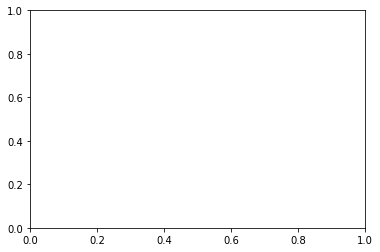

In [311]:
%matplotlib inline
fig, ax = plt.subplots()
cax = ax.scatter(np.log10(10**df['Mean']/df['lyaplong']), np.log10(featsN['medvarEM']), c=np.log10(df['KSpval']), vmax=-10)
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_ylim([0, 1e5])
plt.colorbar(cax)

/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


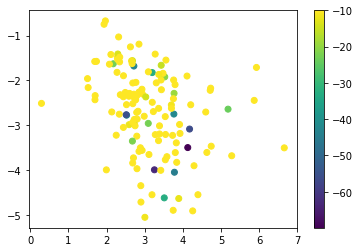

In [324]:
%matplotlib inline
fig, ax = plt.subplots()
cax = ax.scatter(np.log10(cut['lyaplong']), np.log10(cutfeatsN['medvarEM']), c=np.log10(cut['KSpval']), vmax=-10)
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_ylim([0, 1e5])
plt.colorbar(cax)

/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


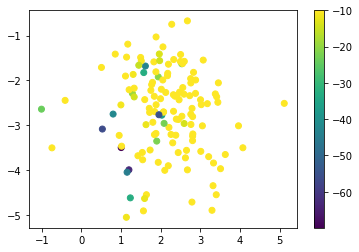

In [323]:
%matplotlib inline
fig, ax = plt.subplots()
cax = ax.scatter(np.log10(10**cut['Mean']/cut['lyaplong']), np.log10(cutfeatsN['medvarEM']), c=np.log10(cut['KSpval']), vmax=-10)
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_ylim([0, 1e5])
plt.colorbar(cax)

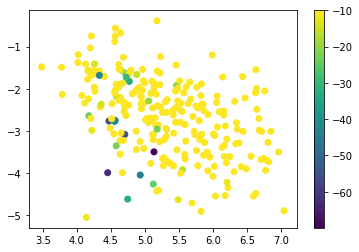

In [320]:
%matplotlib inline
fig, ax = plt.subplots()
cax = ax.scatter(df['Mean'], np.log10(featsN['medvarEM']), c=np.log10(df['KSpval']), vmax=-10)
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_ylim([0, 1e5])
plt.colorbar(cax)

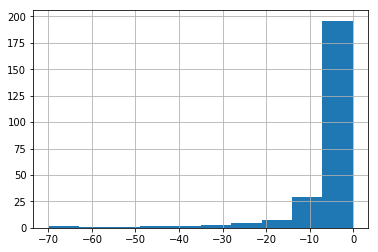

In [325]:
np.log10(df['KSpval']).hist()

In [79]:
10**df['Mean'].head()

0    3.838227e+05
1    1.018614e+06
2    6.272606e+05
3    5.403502e+05
4    2.949911e+06
Name: Mean, dtype: float64

In [78]:
df['tlyap'].head()

0    1.087928e+02
1    1.510911e+03
2    1.074197e+03
3    1.117891e+06
4    1.317746e+07
Name: tlyap, dtype: float64

In [75]:
10**df['Mean']/df['tlyap']

0        3528.015643
1         674.171965
2         583.934365
3           0.483366
4           0.223860
5         541.571490
6           0.000491
7         115.160251
8         189.832246
9        2211.032328
10        485.150186
11       1309.732348
12        146.438199
13        214.589967
14        242.655155
15          0.000207
16       1002.659385
17        547.317758
18        972.047830
19        302.299031
20      61979.692378
21         70.105154
22        209.905748
23         30.834673
24        212.765887
25         36.028587
26         27.576463
27      15383.681977
28        623.070344
29        528.937433
           ...      
218         1.125874
219         0.000306
220       106.531875
221       233.231485
222       191.529361
223      1497.101223
224        10.073981
225         0.000122
226       424.657518
227       546.360395
228      1959.427000
229      1213.503798
230       363.854358
231         0.206486
232       806.219846
233       535.794171
234       139

In [52]:
featsN.shape

(248, 70)

In [32]:
bad = df[df['KSpval']<1.e-15][['ID', 'Mean', 'Sigma']]
bad

ID      Mean     Sigma
24    1223  4.708216  0.732807
25    1230  5.464342  0.770067
34    1277  5.055220  0.346390
43    1356  4.554517  0.060894
44    1364  4.704212  0.048453
61    1508  4.176141  0.003016
67    1601  4.453021  0.082194
75    1640  4.769929  0.099722
99    1819  4.329900  0.105695
102   1829  5.132111  0.040220
114   1880  4.563889  0.196076
128   1946  5.122270  0.016139
135   1992  4.726605  0.251192
182   2215  4.471108  0.194576
196   2274  5.551758  0.217880
199   2288  4.746741  0.330456
203   2300  4.577816  0.128797
213   2364  4.930846  0.090603
231  24930  5.179506  0.470969
246   8744  4.879529  0.197687

In [58]:
good = df[df['KSpval']>0.5][['ID', 'Mean', 'Sigma']]
good

ID      Mean     Sigma
7     1120  4.997963  0.411667
10    1136  5.103045  0.322146
19    1204  4.331881  0.379650
38    1323  5.914748  0.462028
62    1513  6.621907  0.468572
97    1810  5.988657  0.625305
108   1852  6.558341  0.602896
117   1900  6.626749  0.430005
119   1913  6.772448  0.620561
122   1922  6.415573  0.335944
129   1954  6.961201  0.424005
131  19591  6.180919  0.466756
151   2083  5.546853  0.437210
164   2126  5.315302  0.341045
193   2256  5.175030  0.288207
195   2264  4.669132  0.298001
234     25  5.329846  0.334477

In [108]:
feat.loc[good][feat.loc[good, 'EMdetrendedstd'] < 0.1]['EMdetrendedstd']

SimID
1007     0.013552
1041     0.025300
10518    0.080354
1107     0.006868
1206     0.017142
1208     0.022287
1248     0.067095
1313     0.007560
1323     0.011939
1324     0.029527
1344     0.069889
1438     0.052029
1449     0.039117
1476     0.002496
15003    0.061452
1513     0.088284
15220    0.081512
1590     0.023950
1617     0.080317
1657     0.051610
1689     0.038889
1691     0.016911
1720     0.004799
1796     0.021498
1806     0.074600
1815     0.006172
1823     0.017598
1850     0.099338
18539    0.006339
1875     0.070300
           ...   
2161     0.081166
2176     0.008085
2185     0.020607
21872    0.013125
2198     0.077521
2206     0.003689
2214     0.085585
22       0.023530
2220     0.055529
2222     0.010375
2223     0.010474
2234     0.015274
2248     0.062575
2264     0.011816
2285     0.051814
2336     0.003612
2340     0.017215
2359     0.097403
2377     0.008107
2383     0.053054
23975    0.016687
24017    0.034832
24248    0.008559
24576    0.009624
2463

In [104]:
df[(10**df['Mean']/df['tlyap'] < 1.e-3) & (df['KSpval'] > 1.e-5)]

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
6    1107     0.139012  5.690768  0.425052    0.013371     0.009321   
36   1308     0.100868  5.589225  0.598313    0.018983     0.013386   
148  2066     0.194719  5.222122  0.315166    0.010153     0.006921   
186  2223     0.148406  5.757107  0.410887    0.013205     0.009285   
217  2383     0.162987  5.922744  0.377753    0.011834     0.008364   

      Determinant     Gamma  Location     Alpha        EV  maxstddetrended  \
6    1.550773e-08  1.700066  4.974522  0.805959  5.693632         0.000752   
36   6.452408e-08  1.270828  4.808723  0.843520  5.591483         0.000295   
148  4.937743e-09  2.470085  4.484144  0.833145  5.223152         0.001401   
186  1.502801e-08  1.539761  5.135043  0.687508  5.753823         0.000399   
217  9.757589e-09  2.708566  4.947998  1.096928  5.923583         0.000764   

        maxda         tlyap          mind      maxm    KSpval  
6    0.000058  1.000000e+09  9.125142e+00  0.000022  0.004258  
36   0.000118  1.000000e+09  1.216041e+01  0.000003  0.000023  
148  0.000043  1.000000e+09  3.325478e+00  0.000014  0.001343  
186  0.000044  1.000000e+09  1.000000e+09  0.000017  0.000081  
217  0.000013  1.000000e+09  5.604936e+00  0.000002  0.074353

In [199]:
df[df['Mean'] > 7]

ID  Probability     Mean     Sigma  Mean_Error  Sigma_Error  \
165  2135     0.153501  7.04169  0.420865    0.013525     0.009751   

      Determinant     Gamma  Location     Alpha        EV  maxstddetrended  \
165  1.738739e-08  3.114554   5.85216  1.328221  7.040254         0.000985   

        maxda         tlyap      mind      maxm    KSpval  
165  0.000046  16801.771456  7.757361  0.000019  0.341096

In [295]:
df[df['ID']==1992].tsec

135    27804.805416
Name: tsec, dtype: float64

135    4.726605
Name: Mean, dtype: float64
('m', 1.3872926371091192e-05, 9.752498698696663e-07, 2.544530917452311e-06)
('Pratio', 1.6301173700822171, 1.4107868646037824, 2.299748173474455)
56439.6919791
EMmed                  0.3081
EMmax                0.591154
EMdrift               96.9752
EMdetrendedstd       0.154446
EMrollingstd         0.851426
DiffcoeffEM       4.56173e-06
medvarEM                  NaN
Name: 1992, dtype: object
('std', 0.0022918924813957109, 0.057540296525415521, 0.010240362396749384)
('final time', 56439.69197907996)


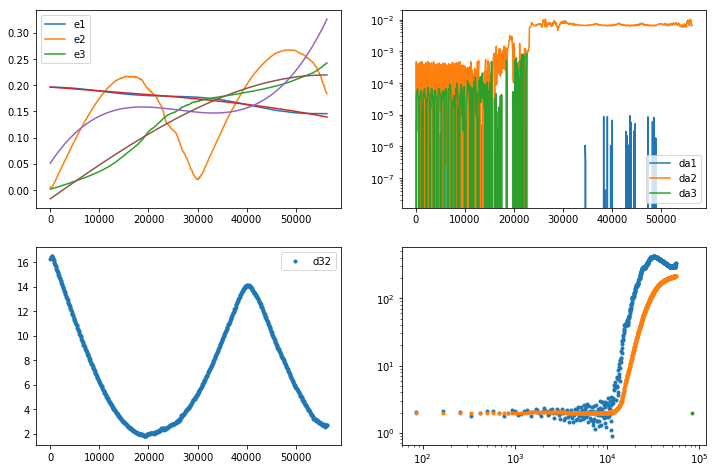

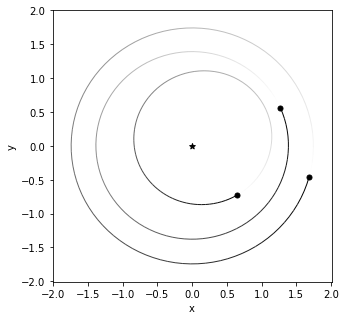

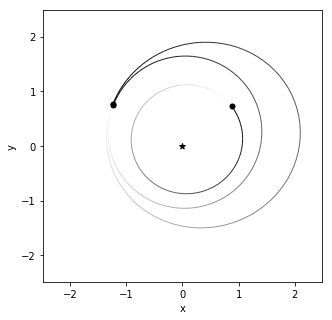

In [297]:
ID = 1992
axarr, std, da, tlyap, mind, maxm, sim = plotecc(ID, tmax=3*df[df['ID']==1992].tsec)

In [201]:
from celmech.disturbing_function import laplace_coefficient 
def a(j,k):
    aj = sim.particles[j+1].a
    ak = sim.particles[k+1].a
    if aj > ak:
        return ak/aj
    else:
        return aj/ak

def atilde(j,k):
    aj = sim.particles[j+1].a
    ak = sim.particles[k+1].a
    if aj > ak:
        return 1.
    else:
        return aj/ak
    
def A(sim):
    M = sim.particles[0].m
    mat = np.zeros((3,3))
    
    for j in range(3):
        pj = sim.particles[j+1]
        for k in range(3):
            if k == j:
                continue
            pk = sim.particles[k+1]    
            mat[j,j] += pk.m/(M+pj.m)*a(j,k)*atilde(j,k)*laplace_coefficient(1.5, 1, 0, a(j,k))
        mat[j,k] *= pj.n/4.
    
    for j in range(3):
        for k in range(3):
            if j==k:
                continue
            pj = sim.particles[j+1]
            pk = sim.particles[k+1]
            mat[j,k] = -0.25*pk.m/(M+pj.m)*pj.n*a(j,k)*atilde(j,k)*laplace_coefficient(1.5, 2, 0, a(j,k))
    return mat

In [202]:
from celmech import *
file = "/mnt/scratch-lustre/nhussain/data/distributions/Sys_{0}_1e8/initial_conditions/ic{1:0=7d}.bin".format(ID, 0)
sim = rebound.Simulation.from_file(file)

In [203]:
mat = A(sim)
eigenfreq = np.linalg.eig(mat)[0]
sectscales = np.abs(2*np.pi/eigenfreq)
minsect = np.min(sectscales)
minsect

41543.263596033117

In [204]:
sectscales

array([   41543.26359603,  2124035.86328843,   122486.65482916])

In [208]:
from celmech import *
file = "/mnt/scratch-lustre/nhussain/data/distributions/Sys_{0}_1e8/initial_conditions/ic{1:0=7d}.bin".format(ID, 0)
sim = rebound.Simulation.from_file(file)
    
pvars = Poincare.from_Simulation(sim)
Hsim = PoincareHamiltonian(pvars)
Nbodies = Hsim.state.N
expand_order=4
for i in range(1,Nbodies):
    for j in range(i+1,Nbodies):
        Hsim.add_secular_terms(i,j,expand_order)
Hsim.set_secular_mode()

Computing secular expansion to order 4...


In [209]:
%%time
tFin,Nout= 1e5,1000
times= np.linspace(0,tFin,Nout)
rebound_ecc = np.zeros((3,Nout))
celmech_ecc = np.zeros((3,Nout))
for i,t in enumerate(times):
    for j in range(1,sim.N):
        celmech_ecc[j-1,i] = Hsim.state.particles[j].e
        rebound_ecc[j-1,i] = sim.particles[j].e
    Hsim.integrate(t)
    sim.integrate(t)

CPU times: user 5.77 s, sys: 3 ms, total: 5.77 s
Wall time: 5.8 s


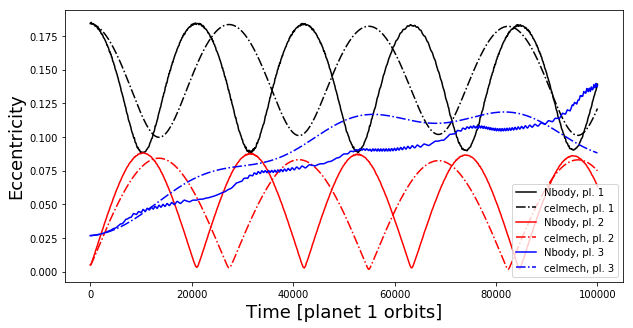

In [210]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(1,figsize=(10,5))
for i,col in enumerate(['k','r','b']):
    ax.plot(times,rebound_ecc[i],'%s'%col,label='Nbody, pl. %d'%(i+1))
    ax.plot(times,celmech_ecc[i],'%s-.'%col,label='celmech, pl. %d'%(i+1))

ax.set_xlabel('Time [planet 1 orbits]',fontsize=18)
ax.set_ylabel('Eccentricity',fontsize=18)
ax.legend()

# Make additional features to plot

In [21]:
df.head()

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
0   1007     0.130767  5.584131  0.461519    0.014201     0.010451   
1   1021     0.185651  6.008010  0.330157    0.010570     0.007475   
2   1025     0.154975  5.797448  0.387122    0.012399     0.008591   
3   1041     0.123930  5.732675  0.489208    0.015449     0.010785   
4  10518     0.143696  6.469809  0.431217    0.013868     0.009608   

    Determinant     Gamma  Location     Alpha        EV  maxstddetrended  \
0  2.201230e-08  2.614027  4.447527  1.283371  5.587615         0.002645   
1  6.242409e-09  3.269655  4.989150  1.129664  6.002008         0.002670   
2  1.134396e-08  2.249906  4.965337  0.938566  5.796653         0.001989   
3  2.773702e-08  1.856930  4.863439  0.972277  5.726901         0.001031   
4  1.775222e-08  1.596694  5.781111  0.761953  6.464390         0.000726   

      maxda         tlyap       mind      maxm        KSpval  
0  0.032087  1.087928e+02   4.544416  0.000037  9.386954e-02  
1  0.000168  1.510911e+03   6.145565  0.000004  3.072049e-01  
2  0.000109  1.074197e+03   5.409844  0.000001  2.789818e-02  
3  0.000636  1.117891e+06   0.765964  0.000002  8.813668e-07  
4  0.000015  1.317746e+07  10.796477  0.000048  4.772941e-03

In [279]:
df = pd.read_csv('distributionfeaturesnew.csv', index_col=0)
df.head()

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
0   1007     0.130767  5.584131  0.461519    0.014201     0.010451   
1   1021     0.185651  6.008010  0.330157    0.010570     0.007475   
2   1025     0.154975  5.797448  0.387122    0.012399     0.008591   
3   1041     0.123930  5.732675  0.489208    0.015449     0.010785   
4  10518     0.143696  6.469809  0.431217    0.013868     0.009608   

    Determinant     Gamma  Location     Alpha        EV  maxstddetrended  \
0  2.201230e-08  2.614027  4.447527  1.283371  5.587615         0.002645   
1  6.242409e-09  3.269655  4.989150  1.129664  6.002008         0.002670   
2  1.134396e-08  2.249906  4.965337  0.938566  5.796653         0.001989   
3  2.773702e-08  1.856930  4.863439  0.972277  5.726901         0.001031   
4  1.775222e-08  1.596694  5.781111  0.761953  6.464390         0.000726   

      maxda         tlyap       mind      maxm        KSpval  
0  0.032087  1.087928e+02   4.544416  0.000037  9.386954e-02  
1  0.000168  1.510911e+03   6.145565  0.000004  3.072049e-01  
2  0.000109  1.074197e+03   5.409844  0.000001  2.789818e-02  
3  0.000636  1.117891e+06   0.765964  0.000002  8.813668e-07  
4  0.000015  1.317746e+07  10.796477  0.000048  4.772941e-03

In [211]:
df.tail()

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
243    62     0.160019  4.681177  0.390651    0.012252     0.008645   
244  7431     0.115723  4.253169  0.520590    0.016502     0.011701   
245  8462     0.110253  5.522564  0.523181    0.017256     0.011694   
246  8744     0.314276  4.879529  0.197687    0.006274     0.004433   
247    91     0.130759  5.469282  0.475402    0.015174     0.010391   

      Determinant     Gamma  Location     Alpha        EV  maxstddetrended  \
243  1.121705e-08  2.097791  3.910796  0.871847  4.682991         0.034429   
244  3.728625e-08  2.259737  3.144284  1.257370  4.258013         0.041716   
245  4.071961e-08  2.096314  4.459373  1.199551  5.521821         0.021455   
246  7.734385e-10  0.833252  4.705257  0.154639  4.875650         0.002679   
247  2.486371e-08  1.634222  4.750447  0.809784  5.475133         0.004951   

        maxda         tlyap      mind      maxm        KSpval  
243  0.000065  5.544899e+02  3.466645  0.000082  5.813520e-03  
244  0.005804  1.000000e+00  0.442309  0.000080  5.248612e-02  
245  0.002604  8.670336e+02  5.336210  0.000019  7.884015e-04  
246  0.000006  1.363567e+04  1.400759  0.000052  6.016481e-16  
247  0.000038  1.699787e+06  2.193098  0.000011  2.705449e-07

In [258]:
from celmech.disturbing_function import laplace_coefficient 
def a(j,k):
    aj = sim.particles[j+1].a
    ak = sim.particles[k+1].a
    if aj > ak:
        return ak/aj
    else:
        return aj/ak

def atilde(j,k):
    aj = sim.particles[j+1].a
    ak = sim.particles[k+1].a
    if aj > ak:
        return 1.
    else:
        return aj/ak
    
def A(sim):
    M = sim.particles[0].m
    mat = np.zeros((3,3))
    
    for j in range(3):
        pj = sim.particles[j+1]
        for k in range(3):
            if k == j:
                continue
            pk = sim.particles[k+1]    
            mat[j,j] += pk.m/(M+pj.m)*a(j,k)*atilde(j,k)*laplace_coefficient(1.5, 1, 0, a(j,k))
        mat[j,k] *= pj.n/4.
    
    for j in range(3):
        for k in range(3):
            if j==k:
                continue
            pj = sim.particles[j+1]
            pk = sim.particles[k+1]
            mat[j,k] = -0.25*pk.m/(M+pj.m)*pj.n*a(j,k)*atilde(j,k)*laplace_coefficient(1.5, 2, 0, a(j,k))
    return mat

In [269]:
def tsec(row):
    system = int(row['ID'])
    file = "/mnt/scratch-lustre/nhussain/data/distributions/Sys_{0}_1e8/initial_conditions/ic{1:0=7d}.bin".format(system, 0)
    sim = rebound.Simulation.from_file(file)
    mat = A(sim)
    eigenfreq = np.linalg.eig(mat)[0]
    sectscales = np.abs(2*np.pi/eigenfreq)
    minsect = np.min(sectscales)
    
    return minsect

In [280]:
%%time
df['tsec'] = df.apply(tsec, axis=1)

CPU times: user 448 ms, sys: 53 ms, total: 501 ms
Wall time: 977 ms


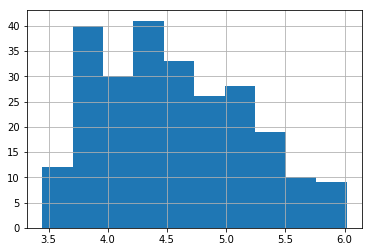

In [276]:
np.log10(df['tsec']).hist()

In [263]:
def lyap(system, tmax=1e4):
    file = "/mnt/scratch-lustre/nhussain/data/distributions/Sys_{0}_1e8/initial_conditions/ic{1:0=7d}.bin".format(system, 0)
    
    sim = rebound.Simulation.from_file(file)
    ps = sim.particles
    sim.init_megno()
    Nout = 1000
    times = np.linspace(0, tmax, Nout)
    Ys, megnos = np.zeros(Nout), np.zeros(Nout)
    
    for i, time in enumerate(times):
        try:
            sim.integrate(time)
            Ys[i] = sim.megno_Ys/sim.t
            megnos[i] = sim.calculate_megno()
        except:
            pass
        
    print(sim.calculate_lyapunov())
    return Ys, megnos, times, sim

In [281]:
def lyaplong(row):
    system = int(row['ID'])
    file = "/mnt/scratch-lustre/nhussain/data/distributions/Sys_{0}_1e8/initial_conditions/ic{1:0=7d}.bin".format(system, 0)
    sim = rebound.Simulation.from_file(file)
    ps = sim.particles
    tmax = 3*row['tsec']
    times = np.logspace(0, np.log10(tmax), 1000)
    sim.init_megno()
    for i, time in enumerate(times):
        try:
            sim.integrate(time)
            tlyap = 1/sim.calculate_lyapunov()
        except:
            return tlyap
        
    return tlyap

In [282]:
%%time
df['lyaplong'] = df.apply(lyaplong, axis=1)

CPU times: user 29min 53s, sys: 442 ms, total: 29min 53s
Wall time: 29min 56s


In [283]:
df.to_csv('distributionfeaturesnewlyaplong.csv')

In [255]:
df = pd.read_csv('distributionfeaturesnewlyaplong.csv', index_col=0)
df.head()

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
0   1007     0.130767  5.584131  0.461519    0.014201     0.010451   
1   1021     0.185651  6.008010  0.330157    0.010570     0.007475   
2   1025     0.154975  5.797448  0.387122    0.012399     0.008591   
3   1041     0.123930  5.732675  0.489208    0.015449     0.010785   
4  10518     0.143696  6.469809  0.431217    0.013868     0.009608   

    Determinant     Gamma  Location     Alpha        EV  maxstddetrended  \
0  2.201230e-08  2.614027  4.447527  1.283371  5.587615         0.002645   
1  6.242409e-09  3.269655  4.989150  1.129664  6.002008         0.002670   
2  1.134396e-08  2.249906  4.965337  0.938566  5.796653         0.001989   
3  2.773702e-08  1.856930  4.863439  0.972277  5.726901         0.001031   
4  1.775222e-08  1.596694  5.781111  0.761953  6.464390         0.000726   

      maxda         tlyap       mind      maxm        KSpval           tsec  \
0  0.032087  1.087928e+02   4.544416  0.000037  9.386954e-02   16353.007841   
1  0.000168  1.510911e+03   6.145565  0.000004  3.072049e-01  197043.220512   
2  0.000109  1.074197e+03   5.409844  0.000001  2.789818e-02  889123.154191   
3  0.000636  1.117891e+06   0.765964  0.000002  8.813668e-07  219339.892905   
4  0.000015  1.317746e+07  10.796477  0.000048  4.772941e-03   33850.755055   

       lyaplong  
0           NaN  
1   -999.000000  
2   -999.000000  
3   -999.000000  
4  64504.619672

In [284]:
df['lyaplong']

0         858.549230
1                NaN
2                NaN
3                NaN
4       52350.305945
5         635.057939
6         799.266877
7                NaN
8                NaN
9                NaN
10        188.440470
11               NaN
12       2324.196903
13        669.721590
14               NaN
15        529.731708
16               NaN
17        216.367362
18        401.183482
19         54.535014
20               NaN
21        480.848590
22               NaN
23        423.500881
24        150.300524
25       3359.458332
26       1899.181342
27         49.103408
28               NaN
29        179.524979
           ...      
218      5676.649641
219      7828.739122
220       276.939119
221              NaN
222      2645.795563
223      1583.536722
224      1066.982113
225      3482.562185
226              NaN
227              NaN
228       489.477551
229       276.361406
230              NaN
231      1243.448818
232              NaN
233              NaN
234       508

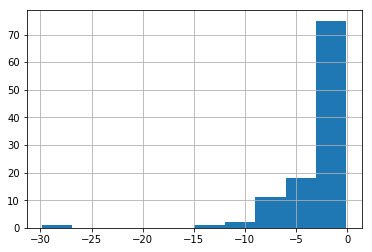

In [288]:
np.log10(df[df['lyaplong'] != df['lyaplong']]['KSpval']).hist()

In [ ]:
fig, ax = plt.subplots()
ax.plot(df[''])

In [242]:
Ys, megnos, times, sim = lyap(10518, tmax=3*101552)

1.71178919015e-05


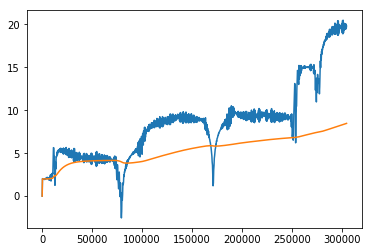

In [243]:
fig, ax = plt.subplots()
ax.plot(times, Ys)
ax.plot(times, megnos)

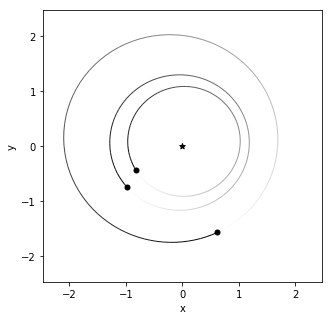

In [241]:
fig = rebound.OrbitPlot(sim)

In [142]:
def test():
    sim = rebound.Simulation()
    sim.add(m=1.)
    sim.add(m=1.e-6, a=1.)
    sim.add(m=1.e-6, a=5.)
    sim.add(m=1.e-6, a=24.)
    ps = sim.particles
    sim.init_megno()
    Nout = 1000
    times = np.linspace(0, 1e4, Nout)
    Ys, megnos = np.zeros(Nout), np.zeros(Nout)
    
    for i, time in enumerate(times):
        try:
            sim.integrate(time)
            Ys[i] = sim.megno_Ys/sim.t
            megnos[i] = sim.calculate_megno()
        except:
            pass
        
    print(sim.calculate_lyapunov())
    return Ys, megnos, times, sim

Ys, megnos, times, sim = test()

1.32226377542e-06


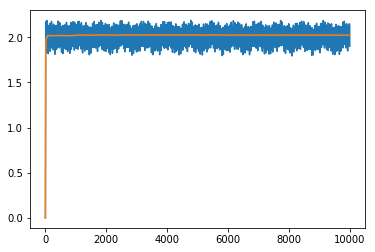

In [143]:
fig, ax = plt.subplots()
ax.plot(times, Ys)
ax.plot(times, megnos)

# Make different combinations and plot

In [22]:
df[(df['tlyap'] > 0)&(df['tlyap'] > 1.e6)][['ID','tlyap']]

ID         tlyap
3     1041  1.117891e+06
4    10518  1.317746e+07
52    1424  1.507398e+06
84    1720  1.071051e+06
93    1796  8.363314e+06
109  18539  1.004896e+06
135   1992  4.281112e+07
169   2161  1.885093e+06
216   2377  1.890542e+06
240   4753  1.468052e+06
247     91  1.699787e+06

In [23]:
df[(df['tlyap'] > 0)&(df['tlyap'] <1.e3)][['ID','tlyap']]

ID       tlyap
0     1007  108.792799
5     1052  290.315677
7     1120  864.291881
8     1124   78.091004
9     1128   76.272578
10    1136  261.317783
11    1137   55.163720
13    1169  656.044420
14    1174  746.548257
16    1194  468.853526
17    1197  226.964110
18       1  310.945632
19    1204   71.030446
20    1206  103.183657
21   12073  471.189485
22    1208  453.287930
24    1223  240.056660
28    1241   99.813511
29    1248   81.478894
31    1261  623.782127
32    1266   87.292900
33    1270  528.162251
35   12840  138.267096
39    1324  255.836657
40    1337  140.291352
41    1344   99.730711
46    1375  407.982318
48    1396  706.787800
49    1403  166.552753
50    1408   62.500541
..     ...         ...
192   2248  131.890604
193   2256  445.363798
195   2264   68.193826
197   2278   90.873982
198   2285   62.579297
200   2296  257.981872
201   2299   77.392914
203   2300  278.783650
205   2301  112.814437
207   2329  339.122516
209   2340  182.206326
210   2341  591.654759
211   2344  535.815088
214   2370  352.426325
220  24008  418.904333
221  24017  824.589813
226  24631  307.071699
227  24705  341.013566
228  24763  375.593350
229  24824  587.411359
230  24923  454.622779
232  24937  625.772470
233  24946  491.800795
235     28  140.570871
237     35  174.727339
239     42   67.688128
241   5505  484.004967
242   5958  738.689829
243     62  554.489869
245   8462  867.033591

[122 rows x 2 columns]

In [24]:
df[df['tlyap'] < 0][['ID','tlyap']]

ID         tlyap
6     1107 -2.127197e+04
15    1190 -7.384581e+03
34    1277 -2.094997e+05
36    1308 -4.025695e+05
43    1356 -1.501352e+05
44    1364 -9.516868e+06
55    1449 -3.047001e+05
61    1508 -2.202125e+05
67    1601 -4.393141e+05
102   1829 -3.886688e+05
117   1900 -5.554814e+06
128   1946 -3.841017e+05
141   2030 -6.756508e+03
143   2048 -6.876359e+04
148   2066 -2.614279e+04
156   2103 -7.167941e+05
160   2116 -1.596099e+06
181   2214 -2.293001e+04
186   2223 -2.117801e+06
202  22998 -6.440314e+04
217   2383 -3.206317e+04
219   2399 -1.757052e+05
225  24576 -6.689466e+05
236   3000 -2.437958e+06

In [25]:
df[df['tlyap'].isnull()]['KSpval']

27     6.624515e-05
53     3.288992e-08
71     1.048034e-01
77     1.622508e-02
85     2.706690e-11
88     1.007939e-01
97     6.374476e-01
108    5.956733e-01
164    7.530473e-01
168    4.171790e-02
170    9.135742e-03
173    7.435316e-02
206    1.052277e-02
238    3.197555e-05
244    5.248612e-02
Name: KSpval, dtype: float64

In [26]:
df[df['Mean'] > 7]

ID  Probability     Mean     Sigma  Mean_Error  Sigma_Error  \
165  2135     0.153501  7.04169  0.420865    0.013525     0.009751   

      Determinant     Gamma  Location     Alpha        EV  maxstddetrended  \
165  1.738739e-08  3.114554   5.85216  1.328221  7.040254         0.000985   

        maxda         tlyap      mind      maxm    KSpval  
165  0.000046  16801.771456  7.757361  0.000019  0.341096

In [27]:
df[df['ID']==2126]

ID  Probability      Mean     Sigma  Mean_Error  Sigma_Error  \
164  2126      0.18294  5.315302  0.341045    0.010742     0.007636   

      Determinant   Gamma  Location     Alpha        EV  maxstddetrended  \
164  6.728264e-09  3.8211  4.125355  1.312049  5.311534         0.015409   

        maxda  tlyap      mind      maxm    KSpval  
164  0.009898    NaN  6.314814  0.000079  0.753047

In [28]:
run(df[df['ID']==2135])

ERROR:root:File `u'(df[df[ID]==2135]).py'` not found.


0.174637868581
0.174637868581
3.85256772704
7.52672510531
11.1910722578
14.8438935024
18.4904626709
22.139040177
25.9414409108
30.3385428548
34.3817094168
36.9686532556
38.6911443959
42.7405505937
47.5092552146
52.0449955149
53.8765587809
52.6946249456
56.3983546781
71.1016129017
73.2591886557
61.484990276
-52.7456194539
-214.961440745
42.755550903
547.3007763
660.575735524
59.1746477018
669.950340825
2587.58956791
3961.35342515
2004.68666312
-7168.92588647
-16032.3648469
-1635.15645587
13368.0134512
16592.4499373
-836.630678756
-1766.4956856
5407.94304563
-13007.3605585
-39039.3107414
-35487.27658
23438.3652687
106139.517138
361548.552375
212394.266143
-8565.85521027
-338811.643164
-860148.910164
15064.6986385
126269.015797
-570197.834887
-582680.236093
824367.839951
1580558.01299
29850669.1901
119781611.249
466920752.987
-187822877.226
-245963485.375
21233885.2205
1269356080.56
1811867495.3
975248666.565
-67998840.2011
2833472212.98
-915915808.894
-8612320125.28
-3757720701.06
751712

-1.13692806127e+98
-3.4022085961e+97
-1.32176479852e+98
2.79525951174e+98
8.27441300695e+97
-2.51070613569e+97
4.34549517978e+96
1.47070927865e+99
3.98991295081e+98
-1.80878782592e+98
5.85780060501e+99
4.37292484159e+99
-9.44683216919e+97
-1.68741334735e+99
-3.86756282745e+100
-5.14931076779e+100
1.30776134434e+100
9.52911264785e+99
-4.16320563963e+100
-7.21929803623e+100
-1.38689451732e+101
3.03654693049e+101
-1.09847740491e+102
-1.17665837454e+103
-1.1810203298e+103
-5.35424580355e+102
8.72862403907e+102
-1.71179917039e+103
5.35542255485e+103
5.71845041275e+103
-4.95889867208e+102
1.9799628057e+103
2.06803516302e+102
4.63521674503e+103
2.7882493039e+104
5.70257242312e+104
2.37961174949e+105
6.88401065235e+105
7.95883373046e+105
5.79967185289e+105
8.57283252712e+105
1.20023722305e+106
8.60324734605e+105
-1.61962106555e+104
-7.26444048999e+106
-1.91594317398e+107
-1.98993021494e+106
9.39307247829e+106
-6.40627234207e+106
-2.61934128576e+108
-5.86889062847e+107
2.92609526116e+108
1.6178

(0.015409122782725897,
 0.0098981300903147225,
 nan,
 6.3148139326155412,
 7.917011181536068e-05,
 0.75304729615225796)

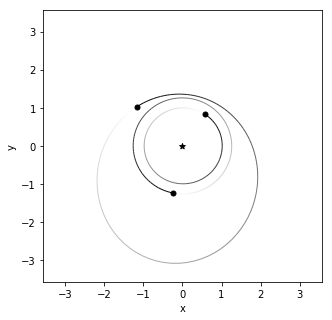

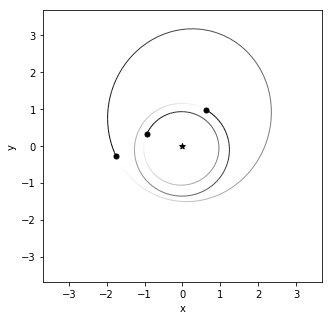

In [17]:
run(df[df['ID']==2126])

In [83]:
bad = df[df['KSpval']<1.e-10]['ID'].values
bad

array([ 1190,  1223,  1230,  1277,  1356,  1364,  1424,  1508,  1601,
        1640,  1742,  1775,  1785,  1819,  1829,  1837,  1880,  1886,
        1928,  1942,  1946,  1957,  1992,  2077,  2215,  2274,  2288,
        2300,  2341,  2364,  2399, 24453, 24930,  4753,  8744])

In [85]:
good = df[df['KSpval']>1.e-10]['ID'].values
good

array([ 1007,  1021,  1025,  1041, 10518,  1052,  1107,  1120,  1124,
        1128,  1136,  1137,  1138,  1169,  1174,  1194,  1197,     1,
        1204,  1206, 12073,  1208,  1217,  1235,  1237,  1241,  1248,
        1251,  1261,  1266,  1270, 12840,  1308,  1313,  1323,  1324,
        1337,  1344,  1350,  1366,  1375,  1379,  1396,  1403,  1408,
        1412,  1426,  1438,  1449,  1476,  1488, 15003,  1504,  1507,
        1513,  1514, 15220,  1590,  1598,  1613,  1616,  1617,  1625,
        1627,  1635,  1636,  1646,  1648,  1657, 16588,  1667,  1675,
        1689,  1691,  1720,  1753, 17641,  1766,  1768,  1791,  1796,
        1799,  1805,  1806,  1810,  1815,  1823,  1827,  1831,  1838,
        1843,  1850,  1852, 18539, 18651,  1875,  1877,  1879,  1899,
        1900,  1911,  1913,  1918, 19197,  1922,  1924,  1929,  1943,
        1954, 19591,  1971,  1979, 19898,  1996,  1999, 20041,  2010,
        2018,  2030,  2032,  2048,  2059, 20620,  2062,  2063,  2066,
        2081,  2083,

In [30]:
weirdmask = df['KSpval'] < 1.e-10 #df['ID'].isin(weird_systems)
weird = df[weirdmask]

In [101]:
feat.loc[good, ['EMdetrendedstd']]

EMdetrendedstd
SimID                
1007         0.013552
1021         0.625532
1025         0.867137
1041         0.025300
10518        0.080354
1052         0.203341
1107         0.006868
1120         0.754027
1124         0.118927
1128         0.498938
1136         1.137330
1137         0.119971
1138         0.420061
1169         0.171953
1174         1.062245
1194         0.932978
1197         0.280609
1            1.723052
1204         0.460213
1206         0.017142
12073        0.366146
1208         0.022287
1217         0.185502
1235         0.222466
1237         0.973401
1241         0.289291
1248         0.067095
1251         0.108756
1261         0.213913
1266         0.235403
...               ...
2359         0.097403
2370         1.244576
2372         0.351771
2377         0.008107
2383         0.053054
23975        0.016687
24008        0.433331
24017        0.034832
24248        0.008559
24346        0.569476
24576        0.009624
24631        0.088765
24705        0.012590
24763        0.371520
24824        0.160756
24923        0.310144
24937        1.029972
24946        0.159543
25           0.077816
28           1.171555
3000         0.857638
35           0.217939
3898         0.258846
42           0.094703
5505         0.222728
5958         0.055090
62           0.160289
7431         0.210923
8462         0.147144
91           0.042101

[213 rows x 1 columns]

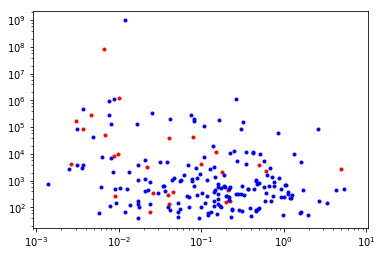

In [100]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(feat.loc[bad]['EMdetrendedstd'], feat.loc[bad]['tlyap'], 'r.')
ax.plot(feat.loc[good]['EMdetrendedstd'], feat.loc[good]['tlyap'], 'b.')
ax.set_yscale('log')
ax.set_xscale('log')

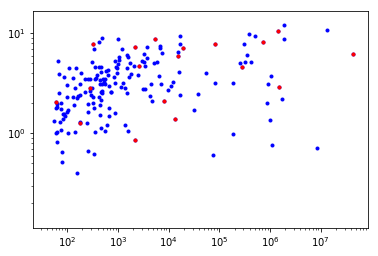

In [31]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df['tlyap'], df['mind'], 'b.')
ax.plot(weird['tlyap'], weird['mind'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')

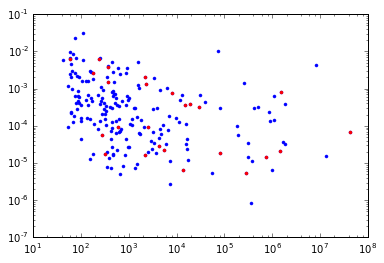

In [29]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df['tlyap'], df['maxda'], 'b.')
ax.plot(weird['tlyap'], weird['maxda'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')

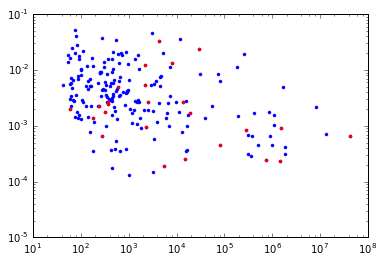

In [30]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df['tlyap'], df['maxstddetrended'], 'b.')
ax.plot(weird['tlyap'], weird['maxstddetrended'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')

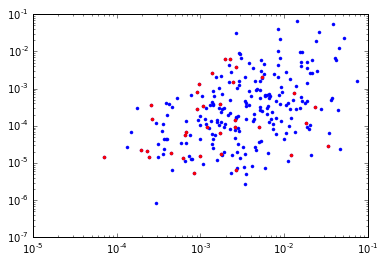

In [31]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df['maxstddetrended'], df['maxda'], 'b.')
ax.plot(weird['maxstddetrended'], weird['maxda'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')

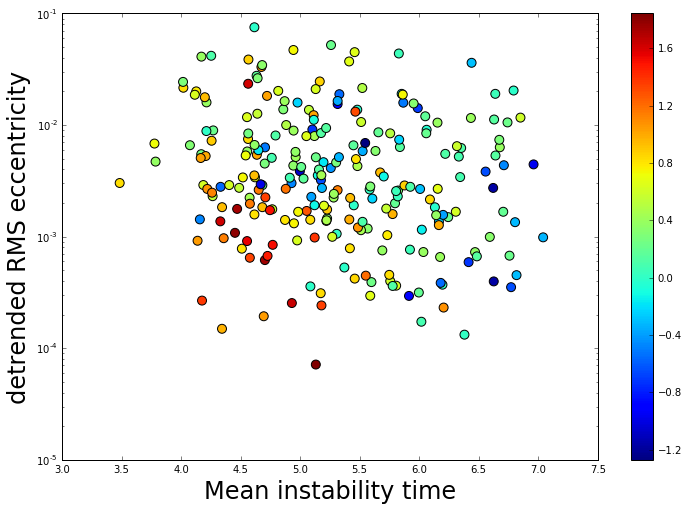

In [101]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,8))
cax = ax.scatter(df['Mean'], df['maxstddetrended'], c=np.log10(-np.log10(df['KSpval']).values), s=80)
#cax = ax.scatter(weird['Mean'], weird['maxstddetrended'], c=np.log10(weird['KSpval']).values/10)
ax.set_yscale('log')
ax.set_ylim([1.e-5, 1.e-1])
ax.set_xlabel('Mean instability time', fontsize=24)
ax.set_ylabel('detrended RMS eccentricity', fontsize=24)
fig.colorbar(cax)
#ax.set_xscale('log')

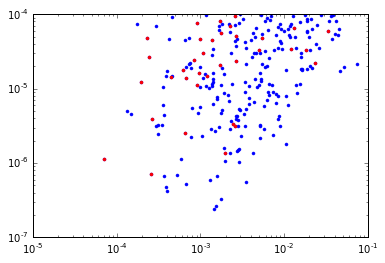

In [65]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df['maxstddetrended'], df['maxm'], 'b.')
ax.plot(weird['maxstddetrended'], weird['maxm'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')

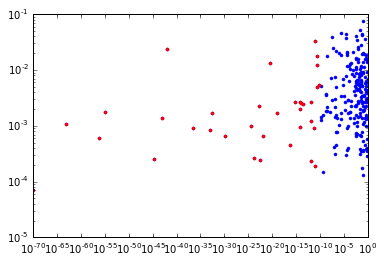

In [32]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df['KSpval'], df['maxstddetrended'], 'b.')
ax.plot(weird['KSpval'], weird['maxstddetrended'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')

# Try different combinations of parameters

In [33]:
goodlowstd = df[(df['maxstddetrended']<1.e-3) & (df['KSpval']>1.e-10)][['ID', 'maxstddetrended', 'KSpval']].sort('KSpval')
goodlowstd.head()

/mnt/raid-cita/dtamayo/p3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


ID  maxstddetrended        KSpval
56    1476         0.000149  3.558185e-10
169   2161         0.000420  7.572132e-08
216   2377         0.000311  1.213526e-07
218  23975         0.000454  2.132645e-07
132   1971         0.000786  2.418179e-07

In [34]:
bigmind = df[(df['mind']>0.01) & (df['KSpval']<1.e-10)][['ID', 'mind', 'KSpval']].sort('KSpval')
bigmind.head()

/mnt/raid-cita/dtamayo/p3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


ID       mind        KSpval
102  1829  11.901273  1.084816e-70
67   1601   7.877339  7.695895e-64
44   1364   0.221885  5.030259e-57
182  2215   7.741012  9.033013e-56
213  2364   5.906212  2.142884e-45

In [59]:
bigstd = df[df['maxstddetrended']>1.e-3][['ID', 'maxstddetrended', 'KSpval']].sort('KSpval')
print(bigstd.shape)
bigstd.head()

(199, 3)


/mnt/raid-cita/dtamayo/p3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


ID  maxstddetrended        KSpval
67   1601         0.001081  7.695895e-64
182  2215         0.001771  9.033013e-56
99   1819         0.001370  1.003610e-43
114  1880         0.023420  1.252303e-42
199  2288         0.001725  2.141012e-33

In [61]:
lowstd = df[df['maxstddetrended']<1.e-3][['ID', 'maxstddetrended', 'KSpval']].sort('KSpval')
print(lowstd.shape)
lowstd.head()

(49, 3)


/mnt/raid-cita/dtamayo/p3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


ID  maxstddetrended        KSpval
102  1829         0.000071  1.084816e-70
44   1364         0.000616  5.030259e-57
213  2364         0.000254  2.142884e-45
43   1356         0.000912  2.331498e-37
75   1640         0.000844  1.228910e-33

In [69]:
lowstdshort = df[(df['maxstddetrended']<1.e-3) & (df['Mean'] < 5.5)][['ID', 'maxstddetrended', 'KSpval']].sort('KSpval')
print(lowstdshort.shape)
lowstdshort.head()

(22, 3)


/mnt/raid-cita/dtamayo/p3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


ID  maxstddetrended        KSpval
102  1829         0.000071  1.084816e-70
44   1364         0.000616  5.030259e-57
213  2364         0.000254  2.142884e-45
43   1356         0.000912  2.331498e-37
75   1640         0.000844  1.228910e-33

In [71]:
badlong = df[(df['KSpval']<1.e-10) & (df['Mean'] > 5.5)][['ID', 'maxstddetrended', 'KSpval']].sort('KSpval')
print(badlong.shape)
badlong.head()

(2, 3)


/mnt/raid-cita/dtamayo/p3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


ID  maxstddetrended        KSpval
196  2274         0.000447  5.926343e-17
240  4753         0.000231  1.068064e-12

In [36]:
badhighstd = df[(df['KSpval']<1.e-10) & (df['maxstddetrended']>1.e-2)][['ID', 'maxstddetrended', 'KSpval']].sort('KSpval')
badhighstd.head()

/mnt/raid-cita/dtamayo/p3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


ID  maxstddetrended        KSpval
114  1880         0.023420  1.252303e-42
25   1230         0.013164  3.016345e-21
124  1928         0.033107  8.270878e-12
126  1942         0.012249  2.122221e-11
85   1742         0.018233  2.706690e-11

/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/rebound/rebound/simulation.py:369: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


m 4.8399028836978624e-05 2.5551988191185988e-05 5.087301374873017e-07
Pratio 2.110147094355015 1.7296156051012814 3.6497433434555595
816908.1629658113
std 0.00515349955652 0.00489434967827 0.0291123030558
final time 816908.1629658113


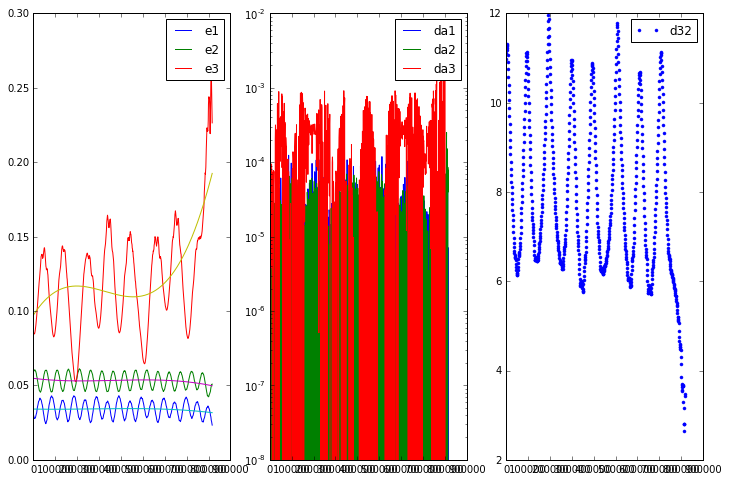

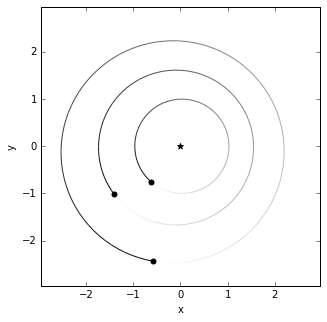

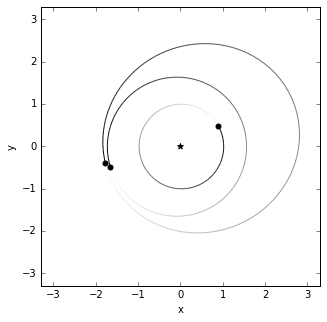

In [75]:
ax, std, da, tlyap, mind, maxm, sim = plotecc(4753, 1.e6)

In [53]:
mind

4.2416956324665192

2.22677586488 4.29930817175 0.0499444566991
1.00384825994 4.59210136255 0.588630169503
1.37922831017 4.28470099033 1.23014519136


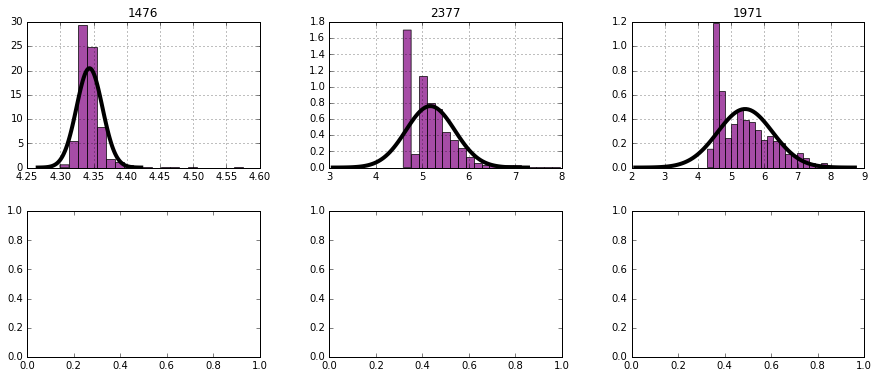

In [55]:
plot_hists([1476, 2377, 1971])

0.890051299254 4.41661187566 0.0336347750484
0.99316500023 4.31851557632 0.150467334391
1.43272304911 4.15581144108 0.181928493952
0.70894066717 4.4612775313 0.191758583486
0.983246075541 4.49261573243 0.260480693859
1.38467090659 3.8109591194 0.990518056577
1.41310045906 4.47393167553 1.0864834806
1.11667536563 4.67411357132 0.392666618489
0.833251932557 4.70525713081 0.154638909864
1.56379313427 4.31521485665 0.375305869029
1.97471642854 3.80950366586 0.872817294799
2.25585292199 4.27475426843 1.17655267558
1.22224144427 3.96168559568 0.319766465045
1.18474332609 4.86587813634 0.660646514323
1.83072936477 3.36826890182 0.954164945256
0.90637631321 4.29043053605 0.399178691595
1.5059817667 4.32146184653 0.884831811701
1.44830516918 3.58401852113 0.64216809705
1.66863127935 3.55295700379 1.3173606241
0.975799503987 4.44739931112 0.185137473236
2.86833589036 3.53951084226 0.743893565773
1.16272831093 5.00050941004 0.434869620369
2.05023515329 5.40112212742 0.86977288745
1.35457507132 5.

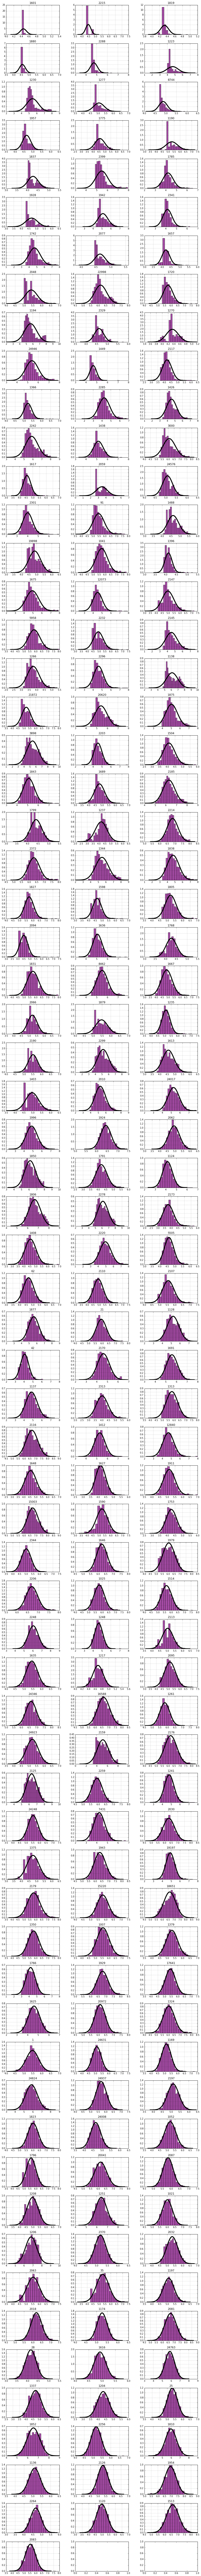

In [60]:
plot_hists(bigstd['ID'])

0.913574821091 5.11056062599 0.0450298550618
0.278281876623 4.68683319613 0.0864509926747
1.77754435998 4.77943269645 0.169554341807
1.29881223833 4.50691427887 0.0537789135472
1.14350054773 4.69323253344 0.0819892754916
1.79135610204 4.28916229884 0.489791181939
1.0540933271 5.10998105842 0.0124734852746
0.748105405245 4.1739215789 0.00262561485307
0.79464514112 4.66478974305 0.461983076594
3.72328143265 4.09555323175 0.530298474652
0.946483246051 5.35177412093 0.201319348716
1.54642245646 3.97182173429 0.426468894845
0.864943800192 5.89950060664 0.347090446046
0.356003599617 4.0917098157 1.25544125607
0.356468235166 4.66854788425 1.20957003726
2.22677586488 4.29930817175 0.0499444566991
2.15543813016 4.50857668971 1.07628380479
1.00384825994 4.59210136255 0.588630169503
1.34705778875 5.27926350562 0.507055437651
1.37922831017 4.28470099033 1.23014519136
1.27901345523 4.24446524507 0.28752686056
1.2708278709 4.8087230497 0.843519771276
2.37364018118 4.29586532831 0.767408717525
1.7143

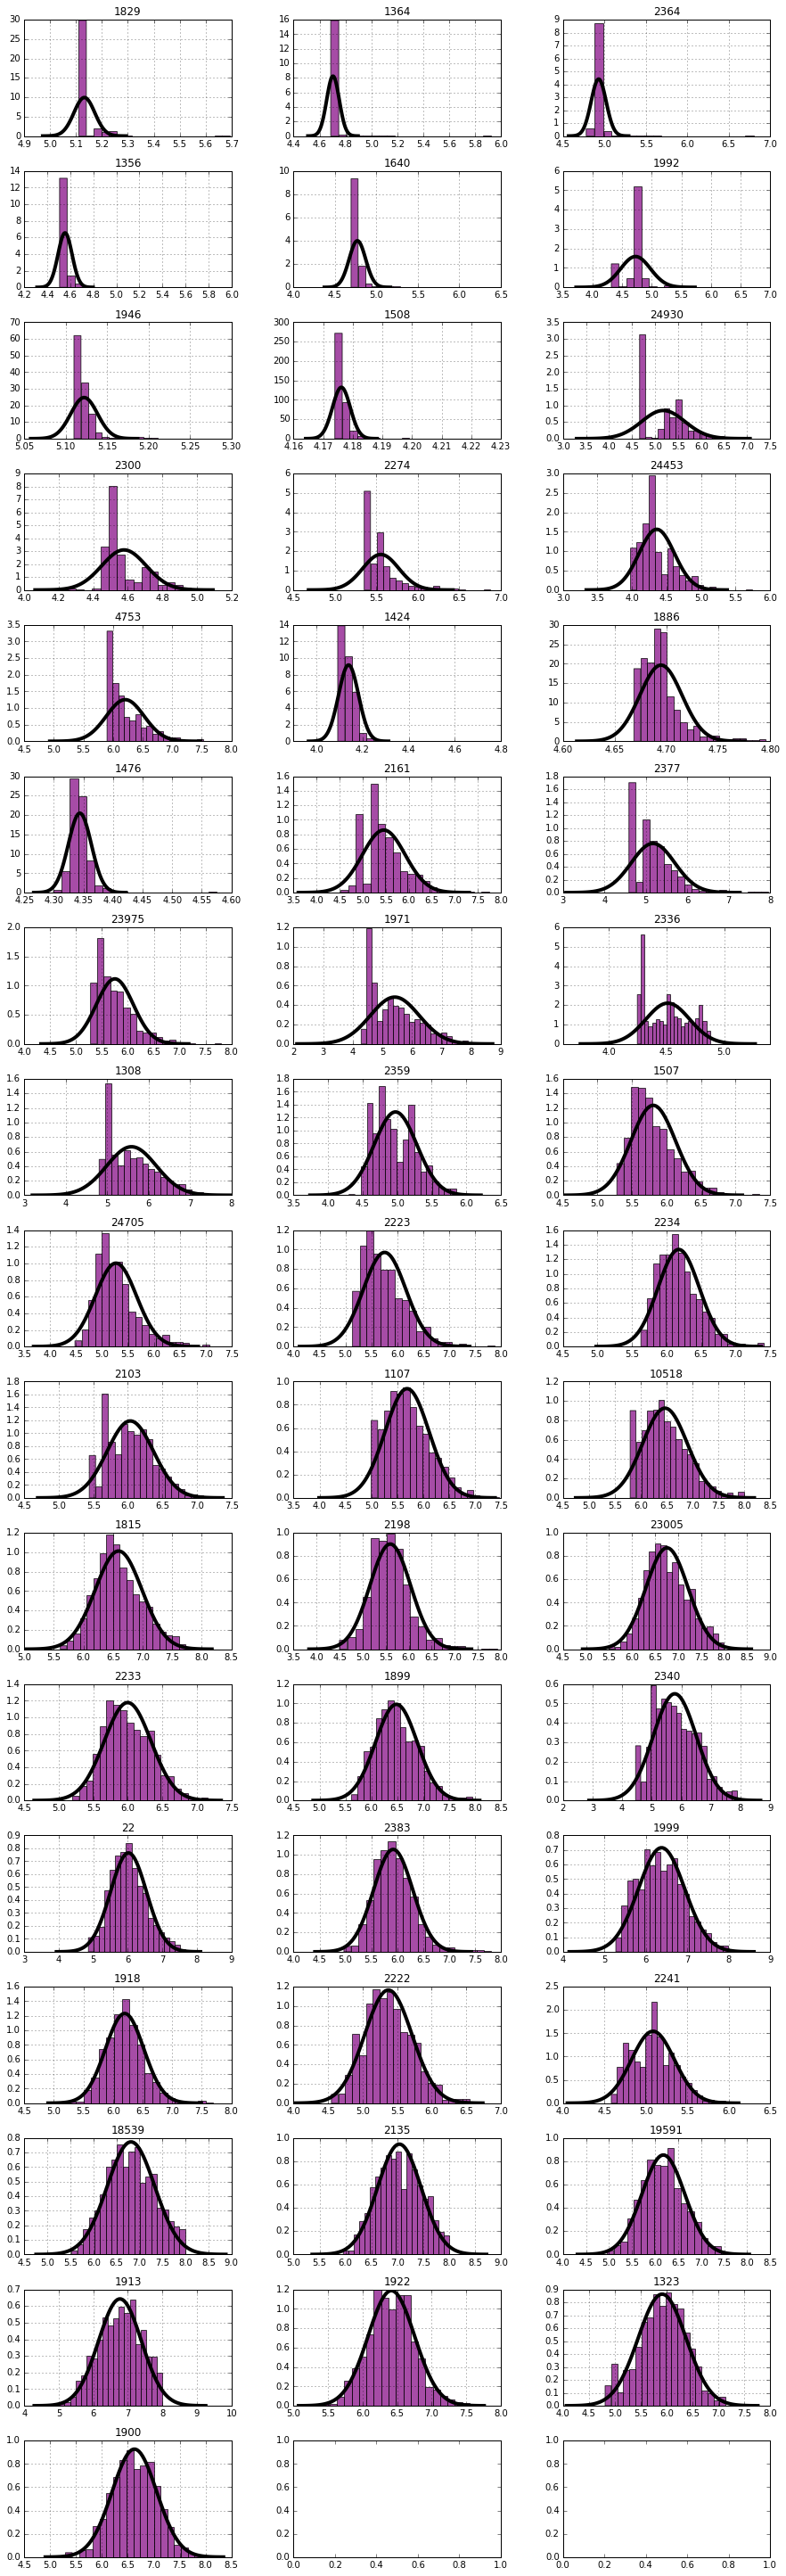

In [62]:
plot_hists(lowstd['ID'])

0.913574821091 5.11056062599 0.0450298550618
0.278281876623 4.68683319613 0.0864509926747
1.77754435998 4.77943269645 0.169554341807
1.29881223833 4.50691427887 0.0537789135472
1.14350054773 4.69323253344 0.0819892754916
1.79135610204 4.28916229884 0.489791181939
1.0540933271 5.10998105842 0.0124734852746
0.748105405245 4.1739215789 0.00262561485307
0.79464514112 4.66478974305 0.461983076594
3.72328143265 4.09555323175 0.530298474652
1.54642245646 3.97182173429 0.426468894845
0.356003599617 4.0917098157 1.25544125607
0.356468235166 4.66854788425 1.20957003726
2.22677586488 4.29930817175 0.0499444566991
2.15543813016 4.50857668971 1.07628380479
1.00384825994 4.59210136255 0.588630169503
1.37922831017 4.28470099033 1.23014519136
1.27901345523 4.24446524507 0.28752686056
2.37364018118 4.29586532831 0.767408717525
2.11109675356 4.47388580895 0.904053495967
2.71369039858 4.49883725673 0.979701726998
2.11763428277 4.567852072 0.588234433293


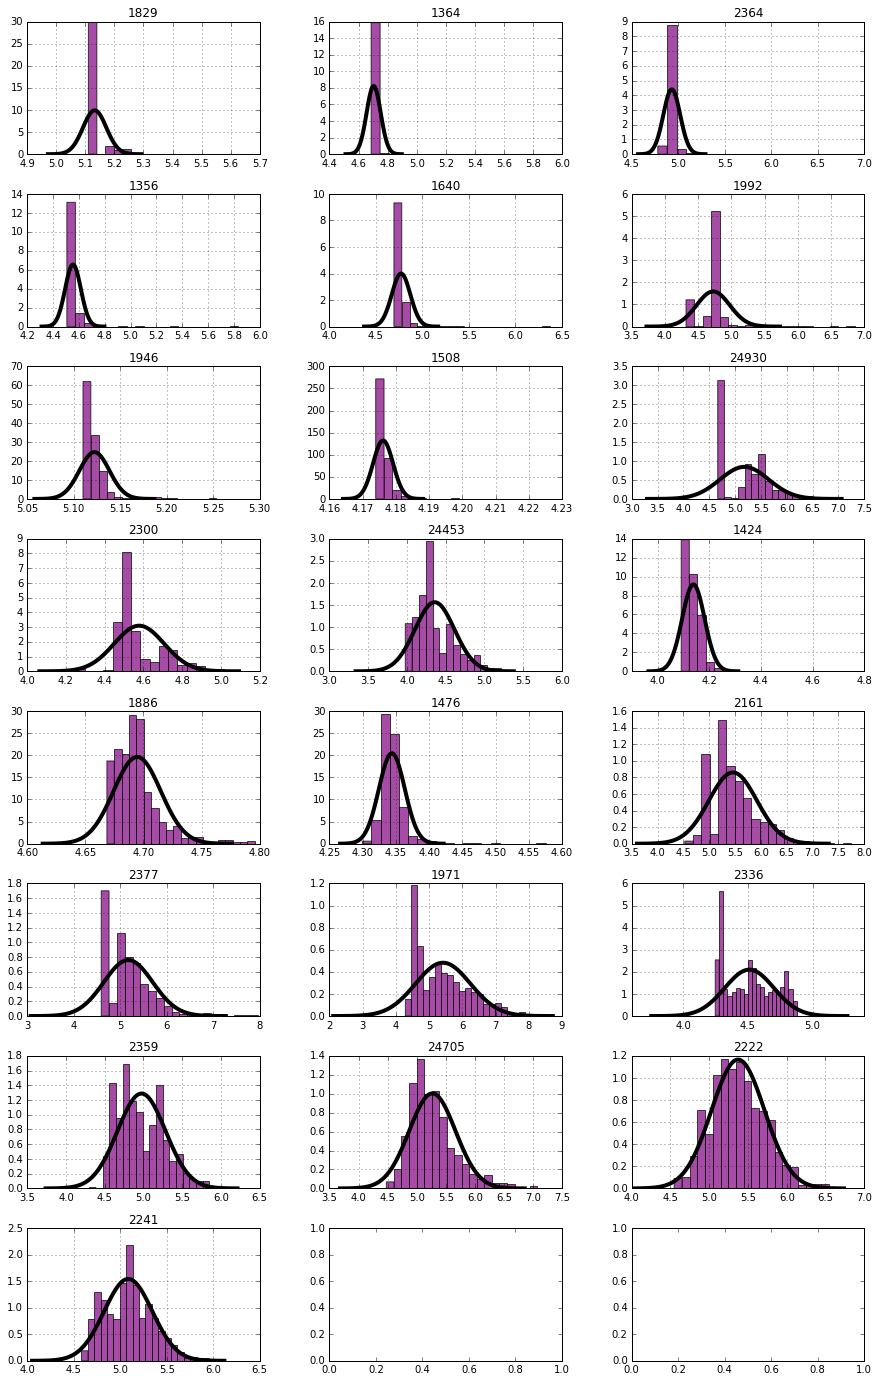

In [70]:
plot_hists(lowstdshort['ID'])

0.946483246051 5.35177412093 0.201319348716
0.864943800192 5.89950060664 0.347090446046
0.864943800192 5.89950060664 0.347090446046


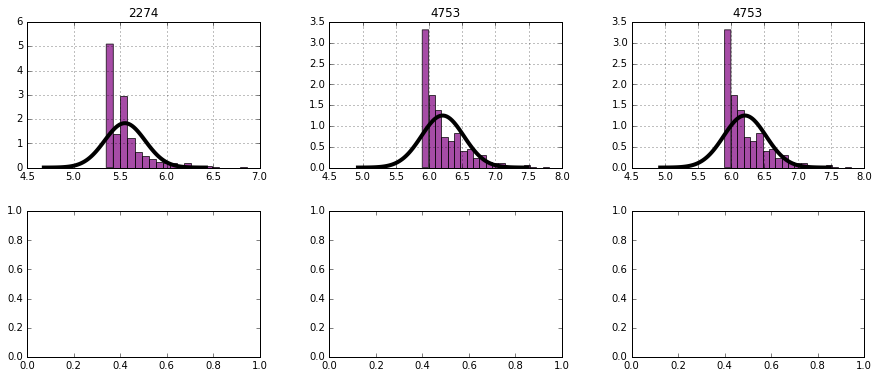

In [74]:
plot_hists([2274, 4753, 4753])

# Check short integration features

In [39]:
dfshort = pd.read_csv('../../csvs/short_integration_features.csv', index_col=0)
dfshort.head()

runstring  Stable  instability_time      Rel_Eerr  t_final_short  \
0  0000000.bin     0.0      1.235644e+07  1.099985e-04        10000.0   
1  0000001.bin     0.0      1.348749e+05  1.388587e-08        10000.0   
2  0000002.bin     0.0      1.276381e+04  3.048261e-04        10000.0   
3  0000003.bin     1.0      1.000000e+09  6.492574e-10        10000.0   
4  0000004.bin     0.0      8.791888e+01  9.336734e-07        10000.0   

   Rel_Eerr_short    avg_a1    std_a1    max_a1    min_a1      ...        \
0    1.346025e-08  1.000165  0.000329  1.001248  0.999691      ...         
1    8.934681e-10  0.999952  0.000739  1.002089  0.998309      ...         
2    3.169983e-08  0.998498  0.001948  1.002043  0.995446      ...         
3    6.097589e-10  1.000006  0.000026  1.000126  0.999973      ...         
4    5.951220e-03  1.067267  0.030186  1.121364  1.000000      ...         

    avg_iH3   std_iH3   max_iH3   min_iH3  avg_ecross3  std_ecross3  \
0  4.706365  0.263380  5.264568  4.410404     0.297364     0.016641   
1  1.777638  0.610370  2.507803  0.588028     0.115674     0.039718   
2  0.982187  0.060058  1.060480  0.875622     0.038930     0.002380   
3  9.848375  0.070031  9.914136  9.650551     0.514386     0.003658   
4  1.453843  0.726529  2.660701  0.154157     0.496372     0.248052   

   max_ecross3  min_ecross3  norm_a3_slope  Lyapunov_time  
0     0.339655     0.010871   2.681898e-11    9041.175397  
1     0.251880     0.137917  -9.314702e-11    2192.382019  
2     0.026117     0.007227  -4.095504e-11    2191.525922  
3     0.301072     0.279903  -7.257099e-12   58599.215966  
4     1.358604     0.261358  -2.610208e-08   43524.152375  

[5 rows x 118 columns]

In [40]:
badshort = dfshort.loc[bad]
goodshort = dfshort.loc[good]
goodshort.shape

(213, 118)

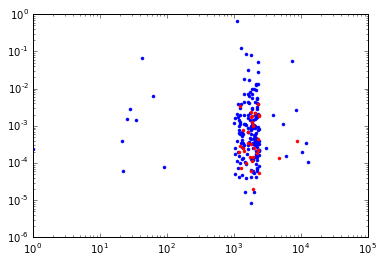

In [41]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(goodshort.index, goodshort['std_a2'], 'b.')
ax.plot(badshort.index, badshort['std_a2'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')

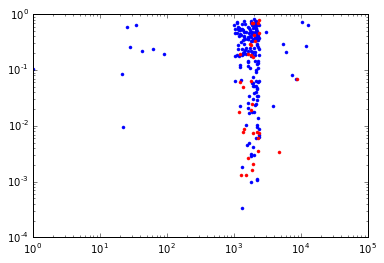

In [42]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(goodshort.index, goodshort['norm_std_window10_e2'], 'b.')
ax.plot(badshort.index, badshort['norm_std_window10_e2'], 'r.')
ax.set_yscale('log')
ax.set_xscale('log')